In [226]:
#importint the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from dotenv import dotenv_values,load_dotenv
import os

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [227]:
ENV = dotenv_values(".env")
load_dotenv(override=True)
#print(os.environ['DATASETS_PATH']+ '/marketing_campaign.csv')

True

In [228]:
#Load the dataset
#xls = pd.ExcelFile(os.environ['DATASETS_PATH'] + '/marketing_campaign.csv')
fileName = os.environ['DATASETS_PATH'] + '/marketing_campaign.csv'
df_mark = pd.read_csv(fileName,sep='\t')
#Data Preview
df_mark

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [229]:
#Lokk if there is any null
df_mark.info()
df = df_mark

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [230]:
#Make it legible 
df['Education']=df['Education'].replace({'Basic':0,'2n Cycle':1,'Graduation':2,'Master':3,'PhD':4})
df['Marital_Status']=df['Marital_Status'].replace({'YOLO':0,'Absurd':0,'Alone':0,'Single':0,'Widow':0,'Divorced':0,'Together':1,'Married':1})
df['Age']=2023-df['Year_Birth']
#Clean DataFrame from useless data
df = df.drop(["Dt_Customer"], axis='columns')
df = df.drop(["ID"], axis='columns')
df = df.drop(["Z_CostContact"], axis='columns')
df = df.drop(["Z_Revenue"], axis='columns')
df = df.drop(["Year_Birth"], axis='columns')
df = df.dropna()
list_keys = df.columns.tolist()
df
#list_keys = df_mark.columns.tolist()

Education  Marital_Status   Income  Kidhome  Teenhome  Recency  \
0             2               0  58138.0        0         0       58   
1             2               0  46344.0        1         1       38   
2             2               1  71613.0        0         0       26   
3             2               1  26646.0        1         0       26   
4             4               1  58293.0        1         0       94   
...         ...             ...      ...      ...       ...      ...   
2235          2               1  61223.0        0         1       46   
2236          4               1  64014.0        2         1       56   
2237          2               0  56981.0        0         0       91   
2238          3               1  69245.0        0         1        8   
2239          4               1  52869.0        1         1       40   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  \
0          635         88              546              172  ...   
1           11          1                6                2  ...   
2          426         49              127              111  ...   
3           11          4               20               10  ...   
4          173         43              118               46  ...   
...        ...        ...              ...              ...  ...   
2235       709         43              182               42  ...   
2236       406          0               30                0  ...   
2237       908         48              217               32  ...   
2238       428         30              214               80  ...   
2239        84          3               61                2  ...   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                     4                  7             0             0   
1                     2                  5             0             0   
2                    10                  4             0             0   
3                     4                  6             0             0   
4                     6                  5             0             0   
...                 ...                ...           ...           ...   
2235                  4                  5             0             0   
2236                  5                  7             0             0   
2237                 13                  6             0             1   
2238                 10                  3             0             0   
2239                  4                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  
0                0             0             0         0         1   66  
1                0             0             0         0         0   69  
2                0             0             0         0         0   58  
3                0             0             0         0         0   39  
4                0             0             0         0         0   42  
...            ...           ...           ...       ...       ...  ...  
2235             0             0             0         0         0   56  
2236             0             1             0         0         0   77  
2237             0             0             0         0         0   42  
2238             0             0             0         0         0   67  
2239             0             0             0         0         1   69  

[2216 rows x 25 columns]

In [231]:
df_describe = df_mark[list_keys]
df_describe.describe()

Education  Marital_Status         Income      Kidhome     Teenhome  \
count  2240.000000     2240.000000    2216.000000  2240.000000  2240.000000   
mean      2.460268        0.644643   52247.251354     0.444196     0.506250   
std       1.004337        0.478728   25173.076661     0.538398     0.544538   
min       0.000000        0.000000    1730.000000     0.000000     0.000000   
25%       2.000000        0.000000   35303.000000     0.000000     0.000000   
50%       2.000000        1.000000   51381.500000     0.000000     0.000000   
75%       3.000000        1.000000   68522.000000     1.000000     1.000000   
max       4.000000        1.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumStorePurchases  NumWebVisitsMonth  \
count      2240.000000  ...        2240.000000        2240.000000   
mean         37.525446  ...           5.790179           5.316518   
std          54.628979  ...           3.250958           2.426645   
min           0.000000  ...           0.000000           0.000000   
25%           3.000000  ...           3.000000           3.000000   
50%          12.000000  ...           5.000000           6.000000   
75%          50.000000  ...           8.000000           7.000000   
max         259.000000  ...          13.000000          20.000000   

       AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
count   2240.000000   2240.000000   2240.000000   2240.000000   2240.000000   
mean       0.072768      0.074554      0.072768      0.064286      0.013393   
std        0.259813      0.262728      0.259813      0.245316      0.114976   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

          Complain     Response          Age  
count  2240.000000  2240.000000  2240.000000  
mean      0.009375     0.149107    54.194196  
std       0.096391     0.356274    11.984069  
min       0.000000     0.000000    27.000000  
25%       0.000000     0.000000    46.000000  
50%       0.000000     0.000000    53.000000  
75%       0.000000     0.000000    64.000000  
max       1.000000     1.000000   130.000000  

[8 rows x 25 columns]

In [232]:
# find the maximum of each column
maxValues = df.max()
print(maxValues)

Education                   4.0
Marital_Status              1.0
Income                 666666.0
Kidhome                     2.0
Teenhome                    2.0
Recency                    99.0
MntWines                 1493.0
MntFruits                 199.0
MntMeatProducts          1725.0
MntFishProducts           259.0
MntSweetProducts          262.0
MntGoldProds              321.0
NumDealsPurchases          15.0
NumWebPurchases            27.0
NumCatalogPurchases        28.0
NumStorePurchases          13.0
NumWebVisitsMonth          20.0
AcceptedCmp3                1.0
AcceptedCmp4                1.0
AcceptedCmp5                1.0
AcceptedCmp1                1.0
AcceptedCmp2                1.0
Complain                    1.0
Response                    1.0
Age                       130.0
dtype: float64


In [233]:
#Seek and destroy
print(df.idxmax())

Education                 4
Marital_Status            2
Income                 2233
Kidhome                 122
Teenhome                 33
Recency                  38
MntWines               1749
MntFruits               855
MntMeatProducts          21
MntFishProducts        1199
MntSweetProducts       1898
MntGoldProds           1975
NumDealsPurchases        21
NumWebPurchases        1898
NumCatalogPurchases      21
NumStorePurchases        51
NumWebVisitsMonth         9
AcceptedCmp3              9
AcceptedCmp4             22
AcceptedCmp5             15
AcceptedCmp1             15
AcceptedCmp2            252
Complain                 78
Response                  0
Age                     239
dtype: int64


In [234]:
#Drop outlayer data
df = df.drop([2233],axis=0)

In [235]:
# Analisis Univariado

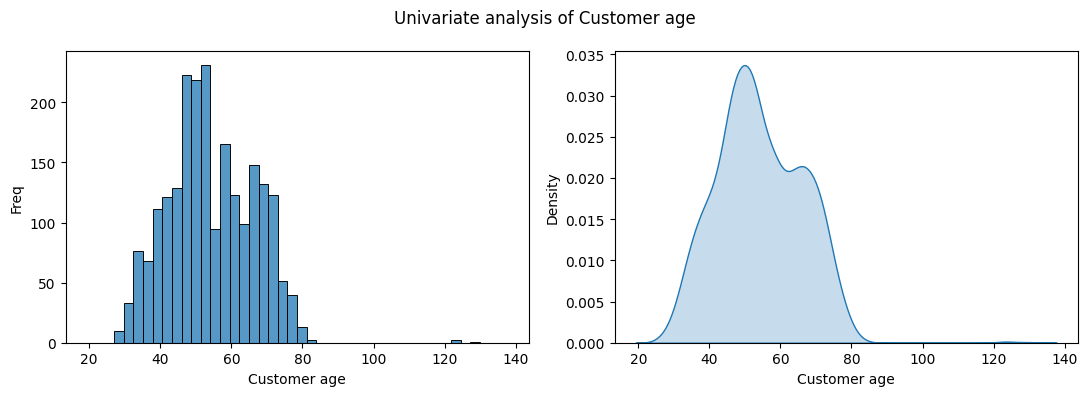

In [236]:
var = 'Age'
var_title = 'Customer age'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Freq')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Density')

fig.suptitle('Univariate analysis of ' + var_title)

plt.tight_layout()

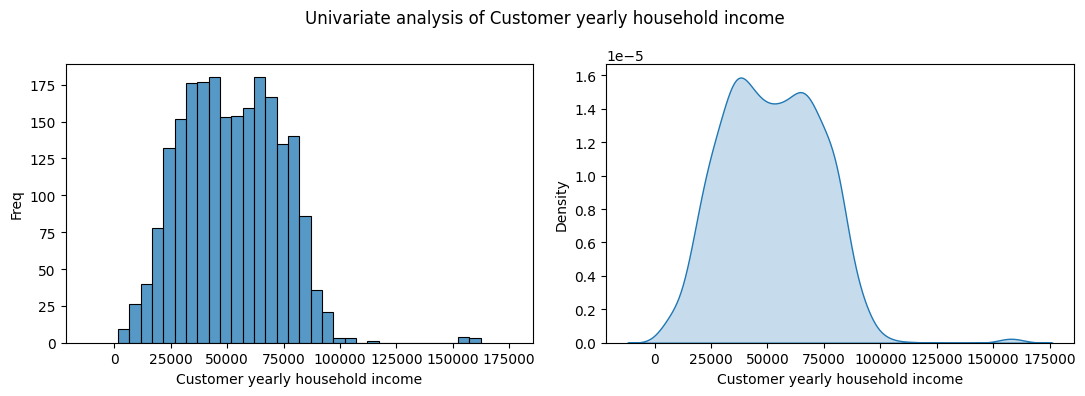

In [237]:
var = 'Income'
var_title = 'Customer yearly household income'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Freq')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Density')

fig.suptitle('Univariate analysis of ' + var_title)

plt.tight_layout()

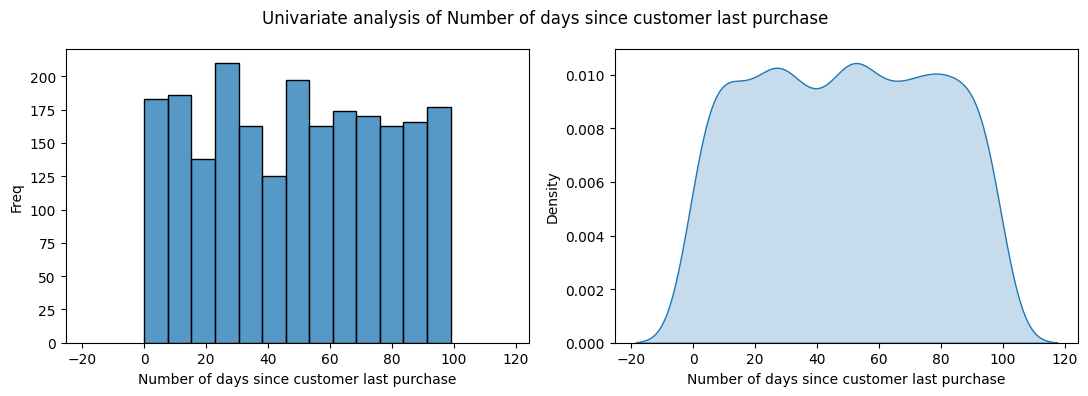

In [238]:
var = 'Recency'
var_title = 'Number of days since customer last purchase'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Freq')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Density')

fig.suptitle('Univariate analysis of ' + var_title)

plt.tight_layout()

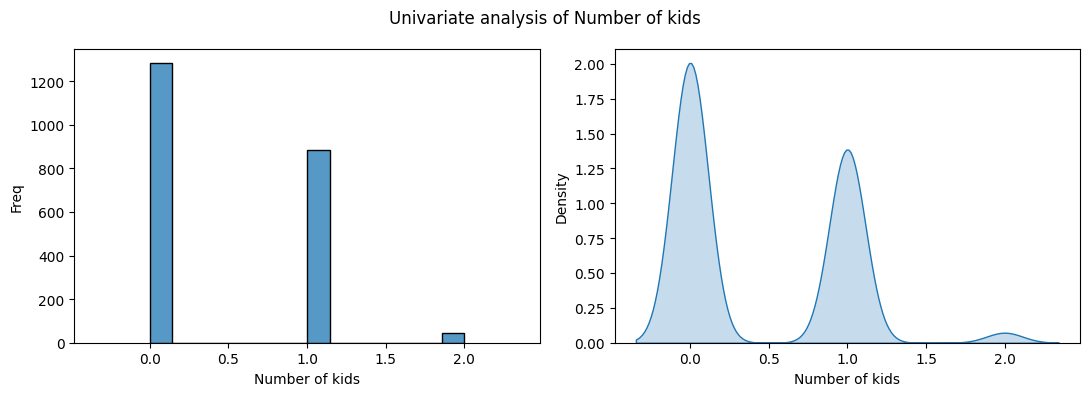

In [239]:
var = 'Kidhome'
var_title = 'Number of kids'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Freq')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Density')

fig.suptitle('Univariate analysis of ' + var_title)

plt.tight_layout()

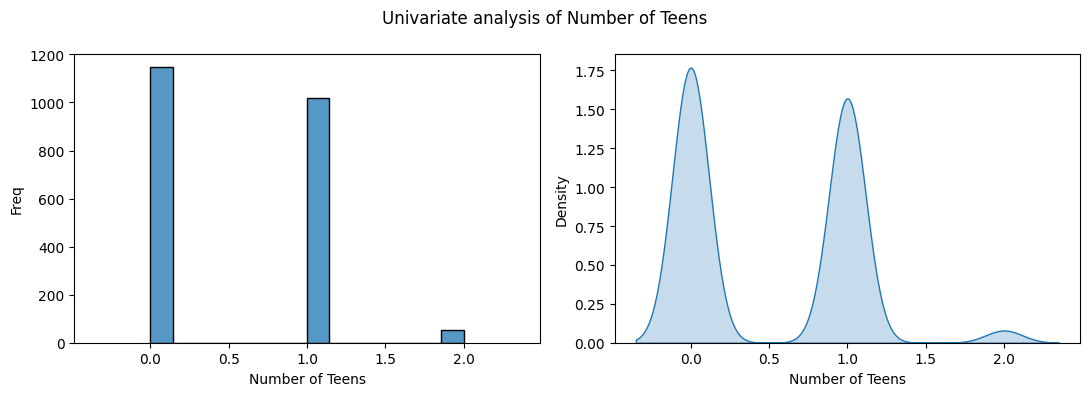

In [240]:
var = 'Teenhome'
var_title = 'Number of Teens'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Freq')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Density')

fig.suptitle('Univariate analysis of ' + var_title)

plt.tight_layout()

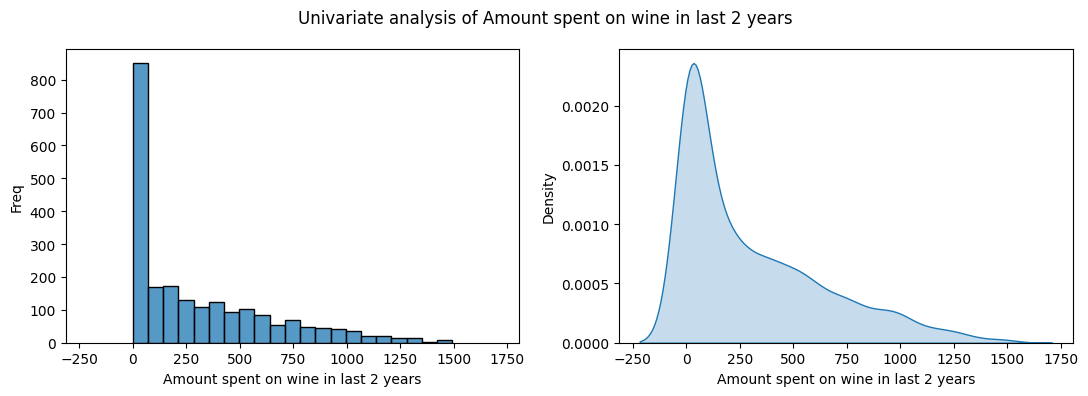

In [241]:
var = 'MntWines'
var_title = 'Amount spent on wine in last 2 years'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Freq')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Density')

fig.suptitle('Univariate analysis of ' + var_title)

plt.tight_layout()

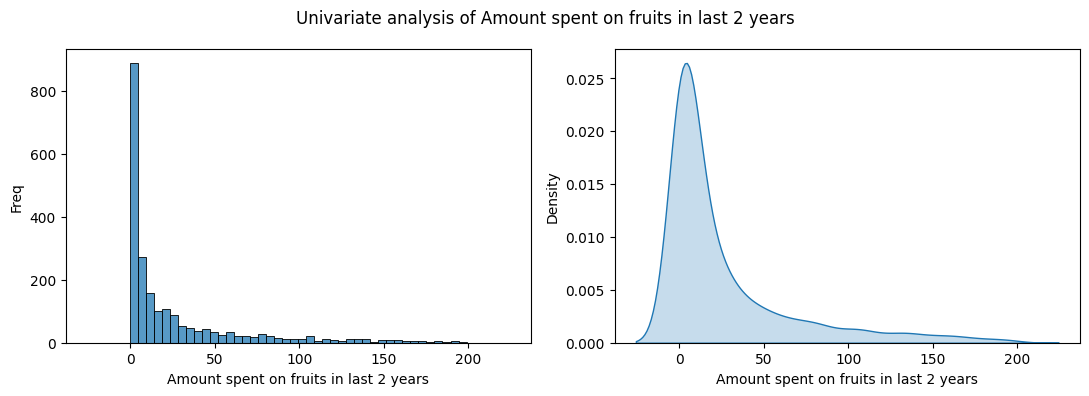

In [242]:
var = 'MntFruits'
var_title = 'Amount spent on fruits in last 2 years'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Freq')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Density')

fig.suptitle('Univariate analysis of ' + var_title)

plt.tight_layout()

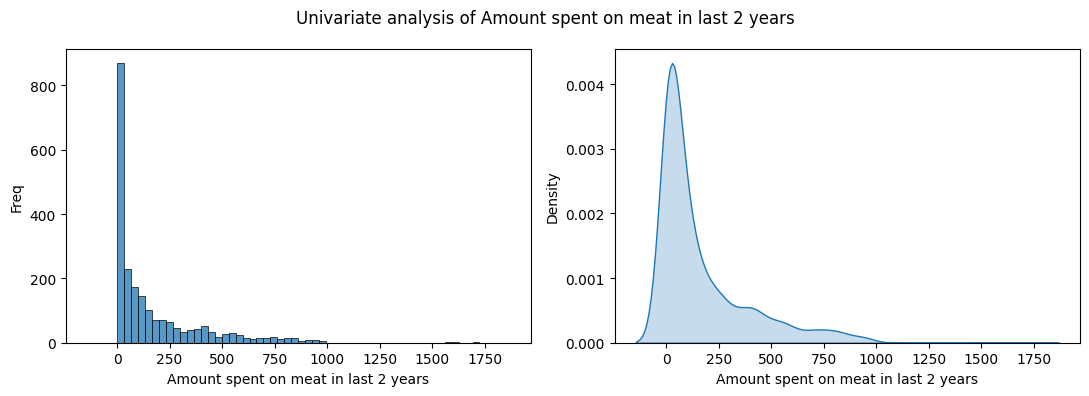

In [243]:
var = 'MntMeatProducts'
var_title = 'Amount spent on meat in last 2 years'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Freq')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Density')

fig.suptitle('Univariate analysis of ' + var_title)

plt.tight_layout()

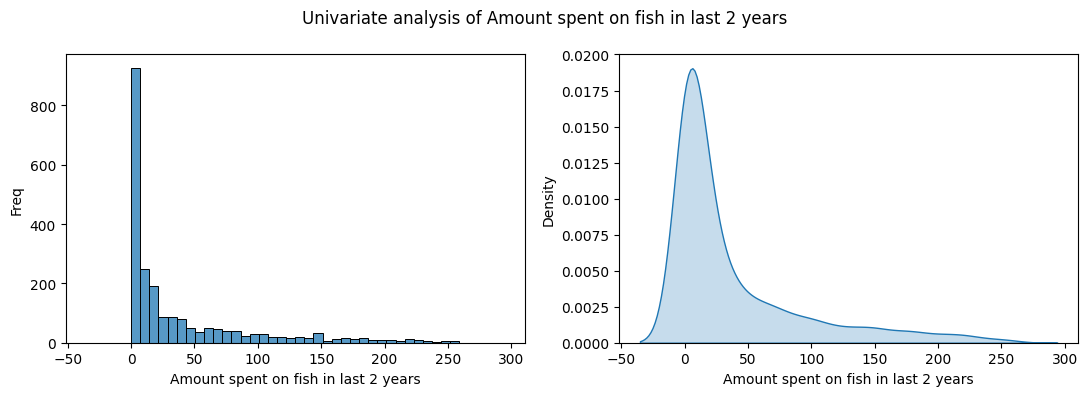

In [244]:
var = 'MntFishProducts'
var_title = 'Amount spent on fish in last 2 years'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Freq')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Density')

fig.suptitle('Univariate analysis of ' + var_title)

plt.tight_layout()

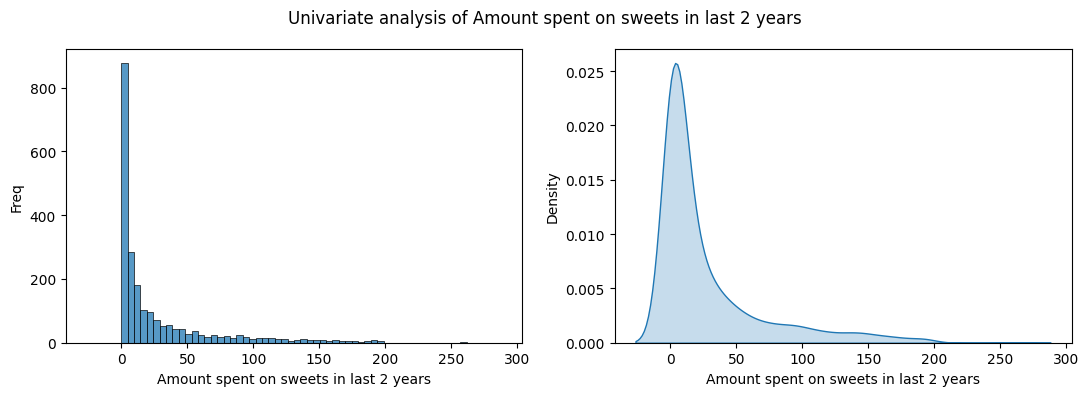

In [245]:
var = 'MntSweetProducts'
var_title = 'Amount spent on sweets in last 2 years'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Freq')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Density')

fig.suptitle('Univariate analysis of ' + var_title)

plt.tight_layout()

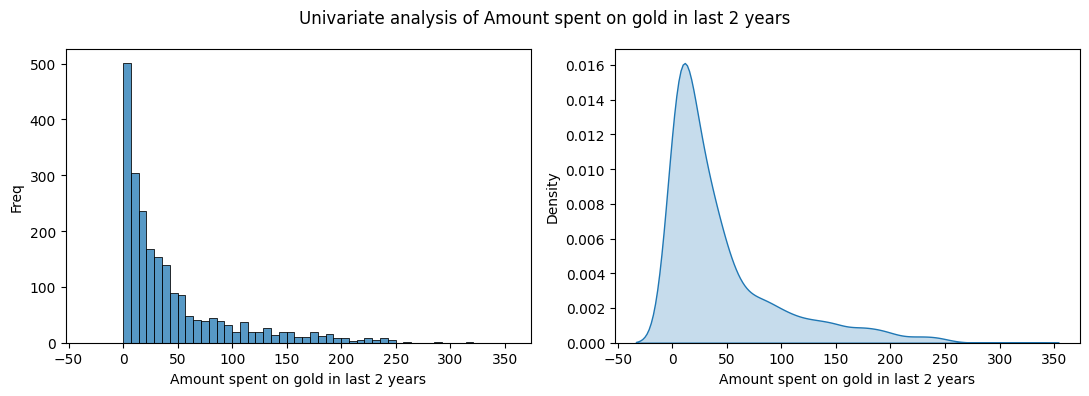

In [246]:
var = 'MntGoldProds'
var_title = 'Amount spent on gold in last 2 years'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Freq')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Density')

fig.suptitle('Univariate analysis of ' + var_title)

plt.tight_layout()

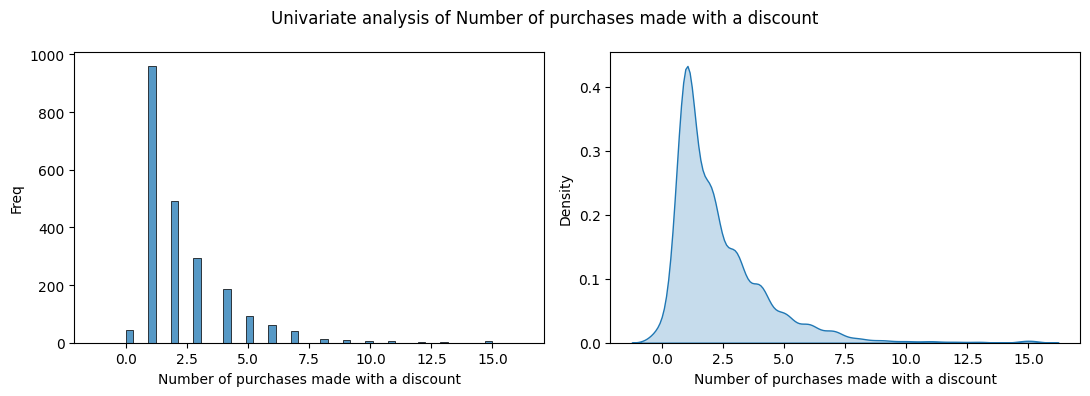

In [247]:
var = 'NumDealsPurchases'
var_title = 'Number of purchases made with a discount'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Freq')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Density')

fig.suptitle('Univariate analysis of ' + var_title)

plt.tight_layout()

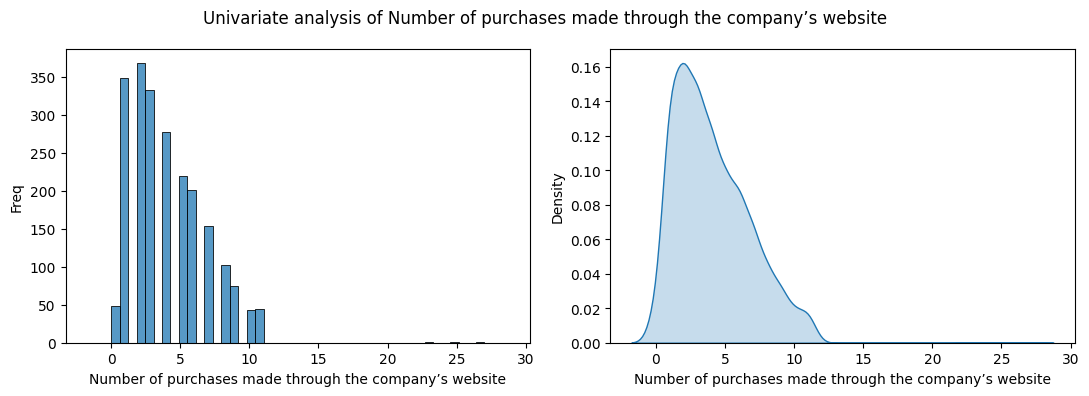

In [248]:
var = 'NumWebPurchases'
var_title = 'Number of purchases made through the company’s website'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Freq')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Density')

fig.suptitle('Univariate analysis of ' + var_title)

plt.tight_layout()

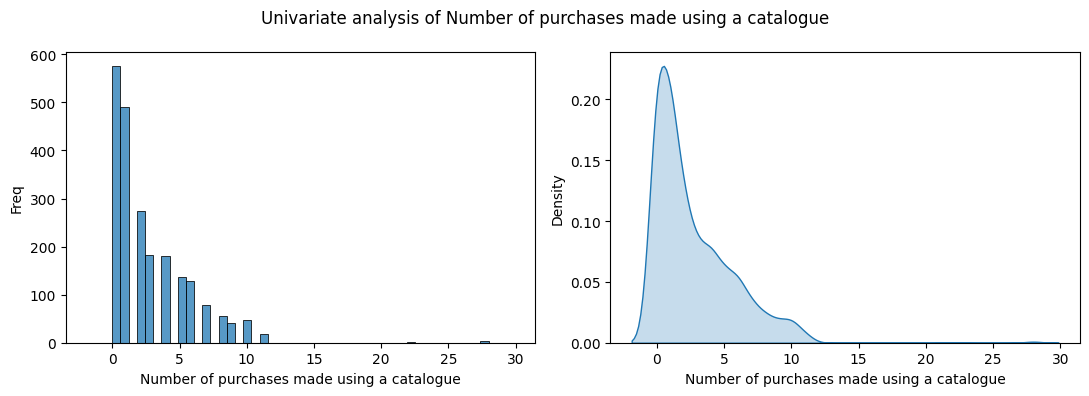

In [249]:
var = 'NumCatalogPurchases'
var_title = 'Number of purchases made using a catalogue'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Freq')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Density')

fig.suptitle('Univariate analysis of ' + var_title)

plt.tight_layout()

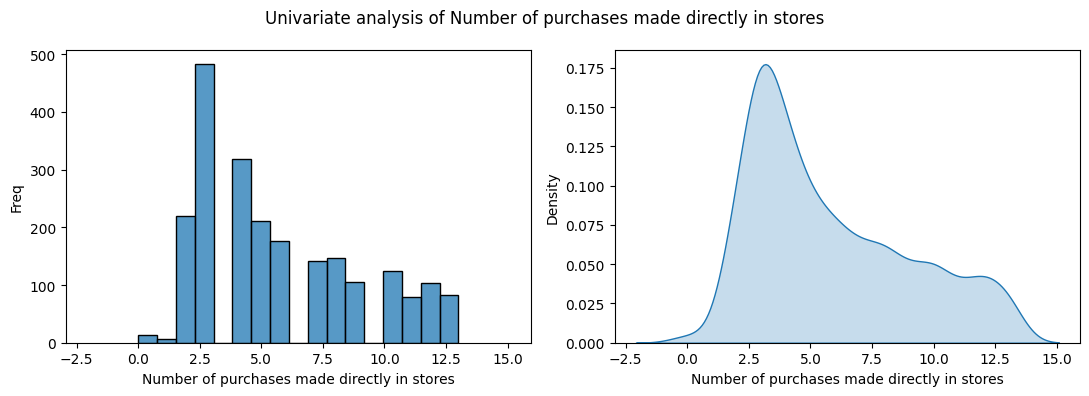

In [250]:
var = 'NumStorePurchases'
var_title = 'Number of purchases made directly in stores'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Freq')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Density')

fig.suptitle('Univariate analysis of ' + var_title)

plt.tight_layout()

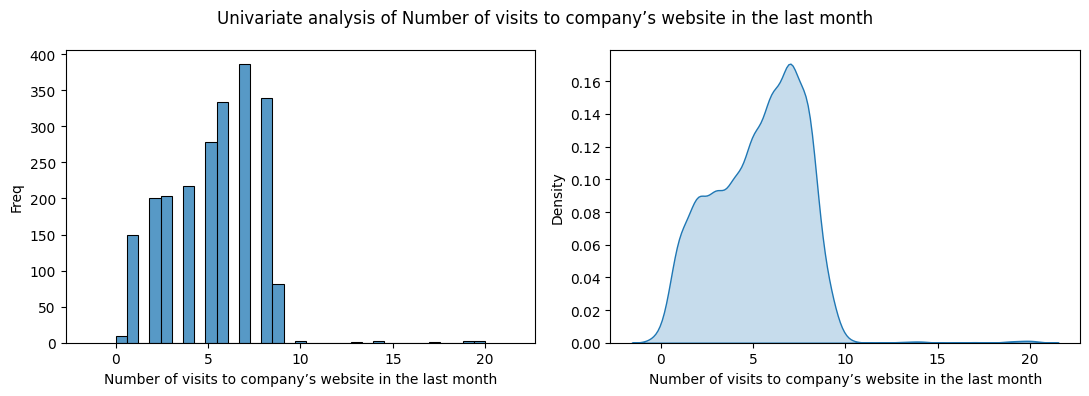

In [251]:
var = 'NumWebVisitsMonth'
var_title = 'Number of visits to company’s website in the last month'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Freq')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Density')

fig.suptitle('Univariate analysis of ' + var_title)

plt.tight_layout()

In [252]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age'],
      dtype='object')

In [253]:
#Dispersion de datos

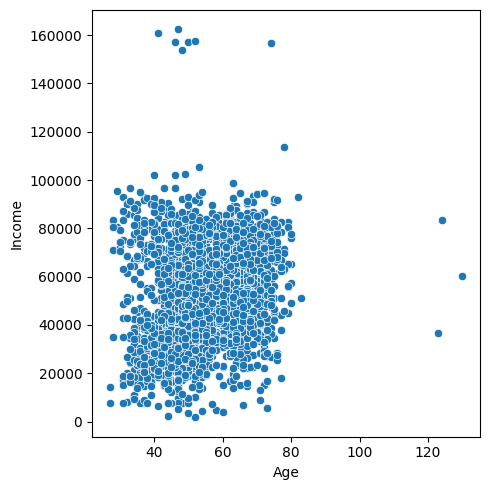

In [254]:
# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=df, x="Age", y="Income", ax=ax)
plt.tight_layout()

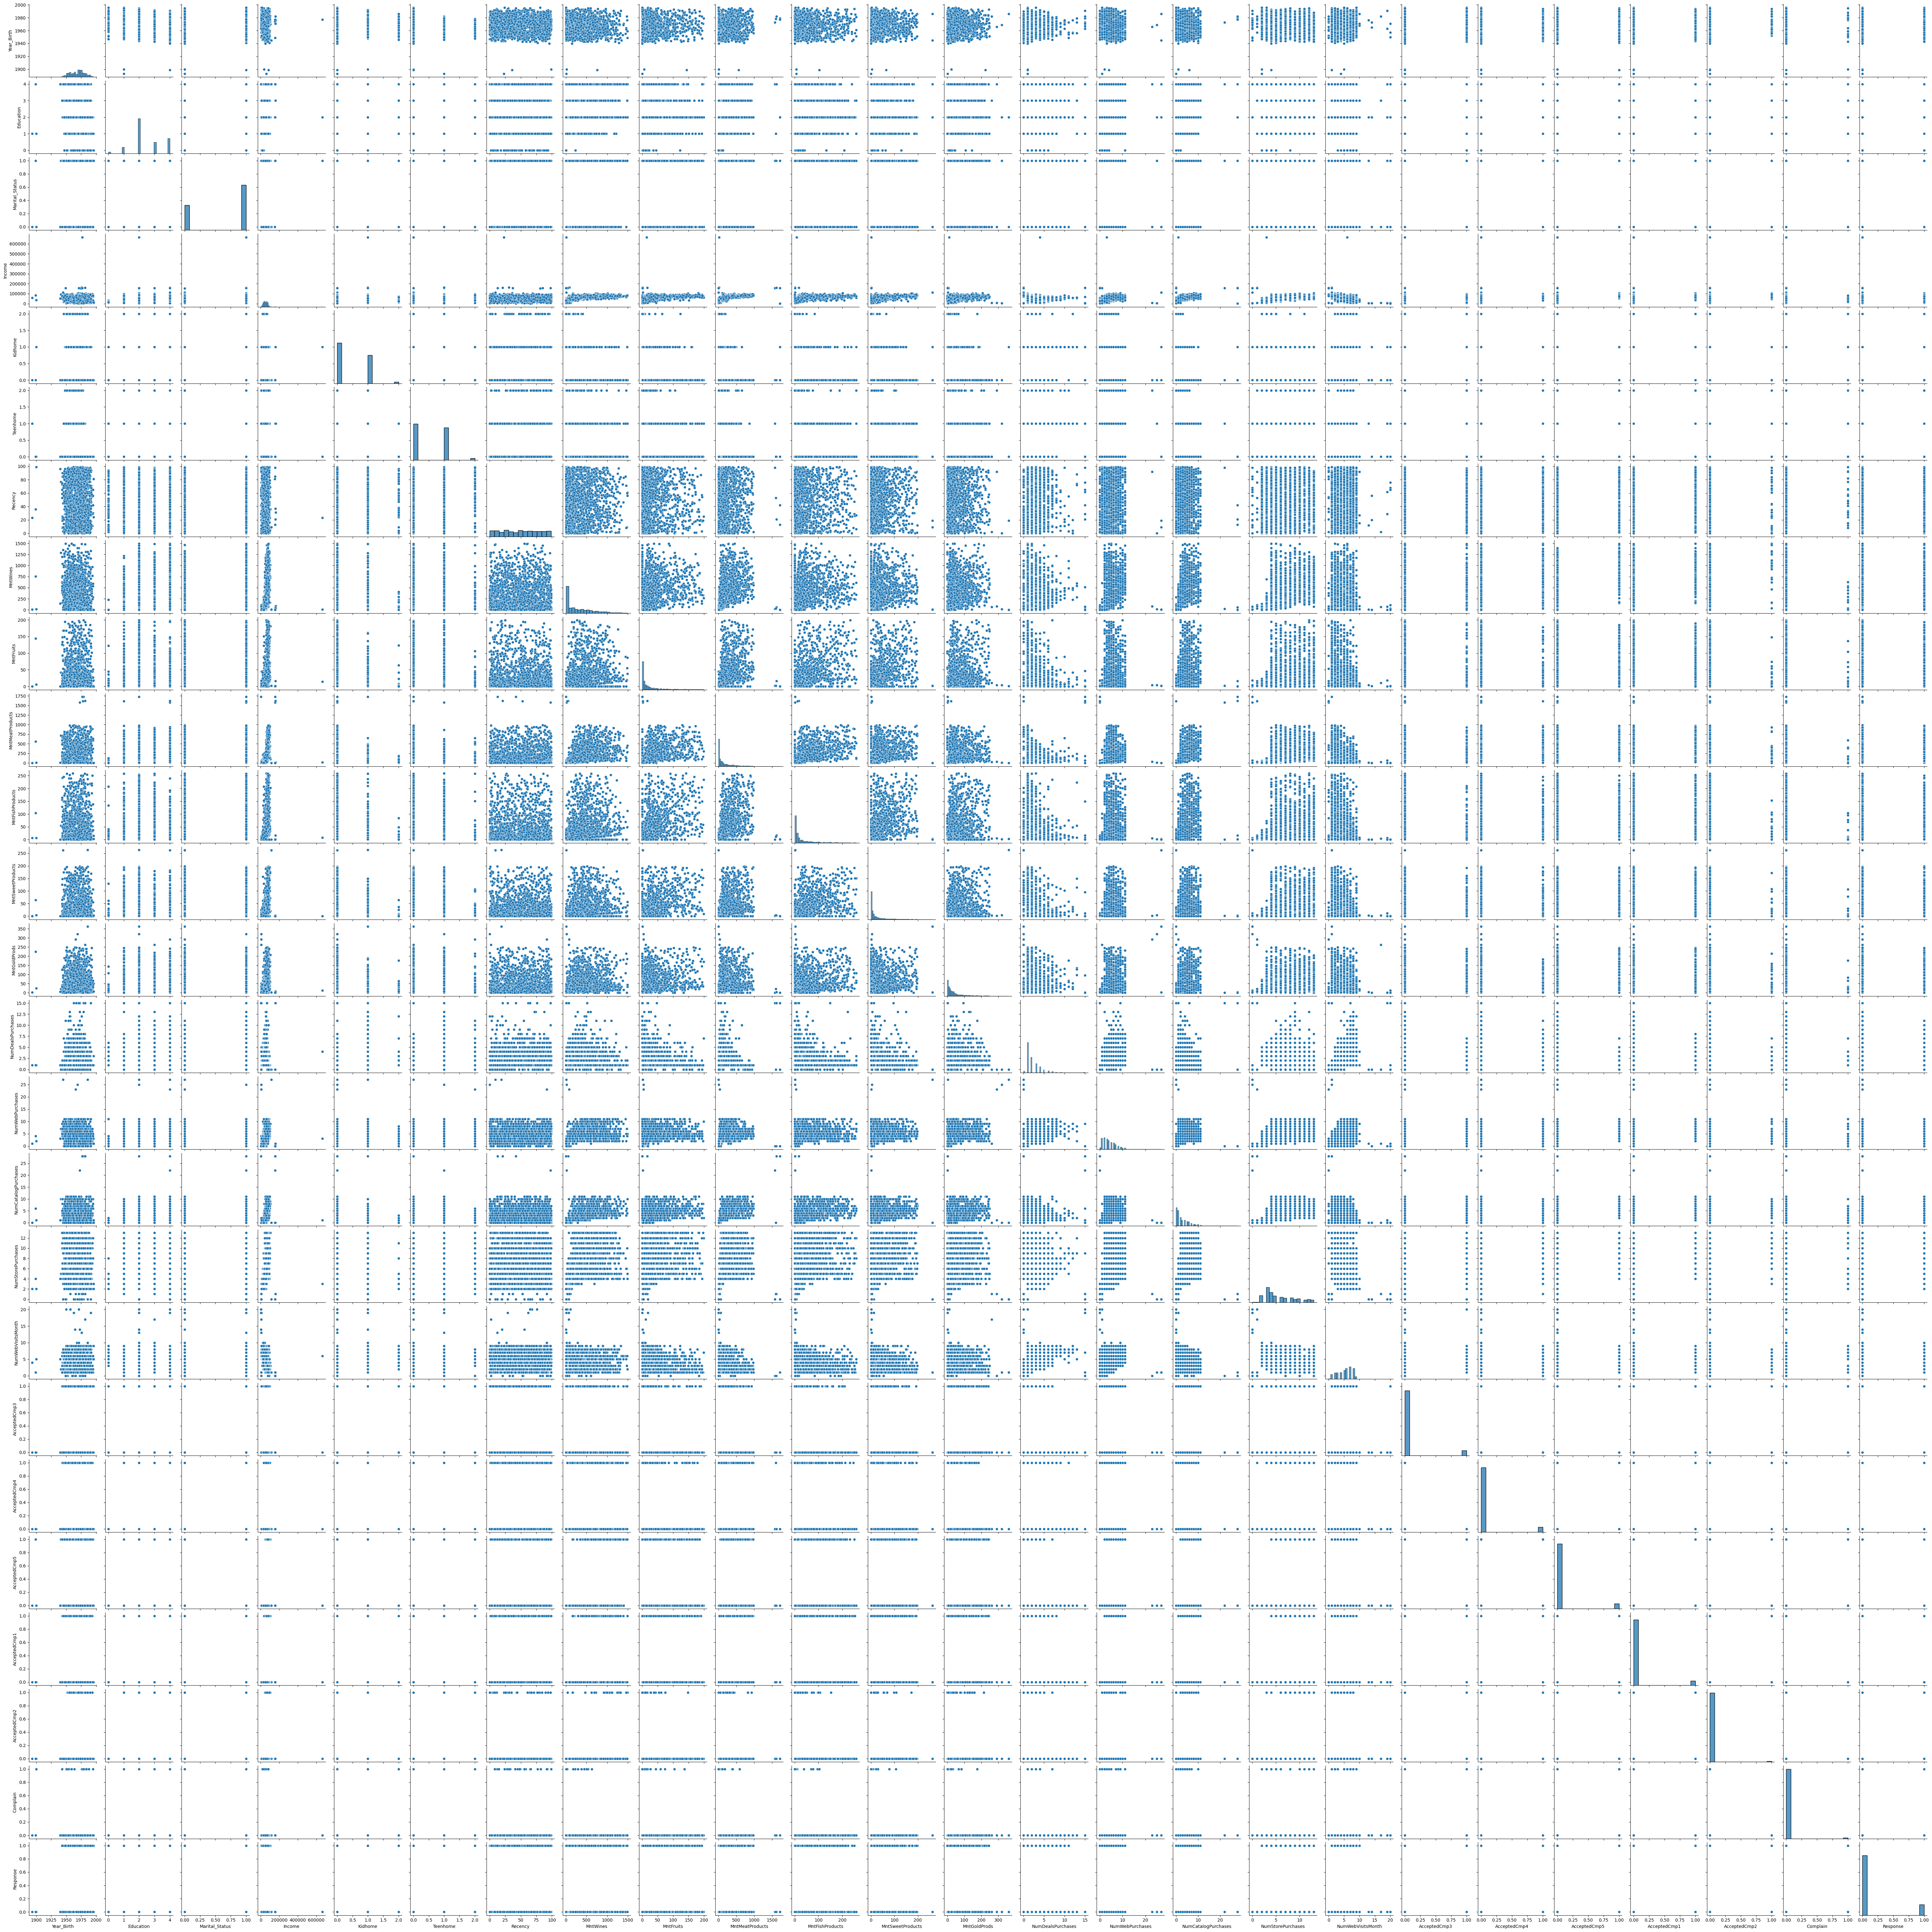

In [72]:
#Un gráfico en el que se puede ver todos los datos numéricos comparados con todos los datos numéricos
df_test = df[list_keys]
sns.pairplot(df_test, diag_kind="hist")

In [255]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age'],
      dtype='object')

In [256]:
list_keys = df.columns.tolist()
df_correlation = df[list_keys]
print(df[list_keys])
df_correlation.corr()

      Education  Marital_Status   Income  Kidhome  Teenhome  Recency  \
0             2               0  58138.0        0         0       58   
1             2               0  46344.0        1         1       38   
2             2               1  71613.0        0         0       26   
3             2               1  26646.0        1         0       26   
4             4               1  58293.0        1         0       94   
...         ...             ...      ...      ...       ...      ...   
2235          2               1  61223.0        0         1       46   
2236          4               1  64014.0        2         1       56   
2237          2               0  56981.0        0         0       91   
2238          3               1  69245.0        0         1        8   
2239          4               1  52869.0        1         1       40   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  \
0          635         88              546              172  ...   

Education  Marital_Status    Income   Kidhome  Teenhome  \
Education             1.000000       -0.008832  0.180586 -0.053510  0.136883   
Marital_Status       -0.008832        1.000000 -0.004104  0.026450  0.031972   
Income                0.180586       -0.004104  1.000000 -0.514935  0.034363   
Kidhome              -0.053510        0.026450 -0.514935  1.000000 -0.039450   
Teenhome              0.136883        0.031972  0.034363 -0.039450  1.000000   
Recency              -0.014047       -0.001071  0.006945  0.011919  0.013466   
MntWines              0.214903       -0.006952  0.688269 -0.497132  0.003380   
MntFruits            -0.076245       -0.025888  0.507959 -0.373350 -0.176726   
MntMeatProducts       0.048616       -0.023096  0.692465 -0.439100 -0.261478   
MntFishProducts      -0.102303       -0.017809  0.520351 -0.388751 -0.205523   
MntSweetProducts     -0.094511       -0.015740  0.523746 -0.377855 -0.163368   
MntGoldProds         -0.093802       -0.025241  0.389204 -0.354857 -0.020152   
NumDealsPurchases     0.033188        0.025863 -0.108457  0.216594  0.386754   
NumWebPurchases       0.101081        0.003588  0.458812 -0.371895  0.161948   
NumCatalogPurchases   0.085588       -0.009666  0.696541 -0.504393 -0.112962   
NumStorePurchases     0.091033        0.004812  0.630397 -0.501151  0.049393   
NumWebVisitsMonth    -0.055911        0.002928 -0.650564  0.447462  0.131386   
AcceptedCmp3          0.003463       -0.018643 -0.015286  0.016203 -0.042649   
AcceptedCmp4          0.062725       -0.006501  0.219337 -0.161936  0.038265   
AcceptedCmp5          0.035331        0.019882  0.396571 -0.205227 -0.190950   
AcceptedCmp1         -0.002433        0.009203  0.327167 -0.174085 -0.144996   
AcceptedCmp2          0.024096       -0.002893  0.103909 -0.081833 -0.015573   
Complain             -0.044794       -0.005337 -0.030583  0.041034  0.003267   
Response              0.099072       -0.150045  0.161049 -0.077733 -0.154114   
Age                   0.184696       -0.001805  0.198064 -0.233376  0.350609   

                      Recency  MntWines  MntFruits  MntMeatProducts  \
Education           -0.014047  0.214903  -0.076245         0.048616   
Marital_Status      -0.001071 -0.006952  -0.025888        -0.023096   
Income               0.006945  0.688269   0.507959         0.692465   
Kidhome              0.011919 -0.497132  -0.373350        -0.439100   
Teenhome             0.013466  0.003380  -0.176726        -0.261478   
Recency              1.000000  0.015370  -0.005971         0.022254   
MntWines             0.015370  1.000000   0.386977         0.568752   
MntFruits           -0.005971  0.386977   1.000000         0.547796   
MntMeatProducts      0.022254  0.568752   0.547796         1.000000   
MntFishProducts      0.000331  0.397602   0.593407         0.573507   
MntSweetProducts     0.024859  0.390178   0.571581         0.535048   
MntGoldProds         0.017417  0.392588   0.396443         0.359328   
NumDealsPurchases    0.002470  0.009235  -0.134416        -0.121079   
NumWebPurchases     -0.005803  0.553745   0.302001         0.307013   
NumCatalogPurchases  0.023856  0.634684   0.486229         0.734082   
NumStorePurchases   -0.000784  0.639889   0.458457         0.485877   
NumWebVisitsMonth   -0.018453 -0.321928  -0.418706        -0.539464   
AcceptedCmp3        -0.032378  0.061363   0.014385         0.018356   
AcceptedCmp4         0.017455  0.373103   0.006356         0.091544   
AcceptedCmp5        -0.000596  0.473530   0.212840         0.376827   
AcceptedCmp1        -0.021172  0.351380   0.191786         0.313034   
AcceptedCmp2        -0.001448  0.206175  -0.009997         0.043491   
Complain             0.013599 -0.039516  -0.005338        -0.023814   
Response            -0.199981  0.246185   0.122391         0.237653   
Age                  0.016023  0.159225   0.017653         0.033499   

                     MntFishProducts  ...  NumStorePurchases  \
Education                  -0

In [257]:
print(df.corr())

                     Education  Marital_Status    Income   Kidhome  Teenhome  \
Education             1.000000       -0.008832  0.180586 -0.053510  0.136883   
Marital_Status       -0.008832        1.000000 -0.004104  0.026450  0.031972   
Income                0.180586       -0.004104  1.000000 -0.514935  0.034363   
Kidhome              -0.053510        0.026450 -0.514935  1.000000 -0.039450   
Teenhome              0.136883        0.031972  0.034363 -0.039450  1.000000   
Recency              -0.014047       -0.001071  0.006945  0.011919  0.013466   
MntWines              0.214903       -0.006952  0.688269 -0.497132  0.003380   
MntFruits            -0.076245       -0.025888  0.507959 -0.373350 -0.176726   
MntMeatProducts       0.048616       -0.023096  0.692465 -0.439100 -0.261478   
MntFishProducts      -0.102303       -0.017809  0.520351 -0.388751 -0.205523   
MntSweetProducts     -0.094511       -0.015740  0.523746 -0.377855 -0.163368   
MntGoldProds         -0.093802       -0.

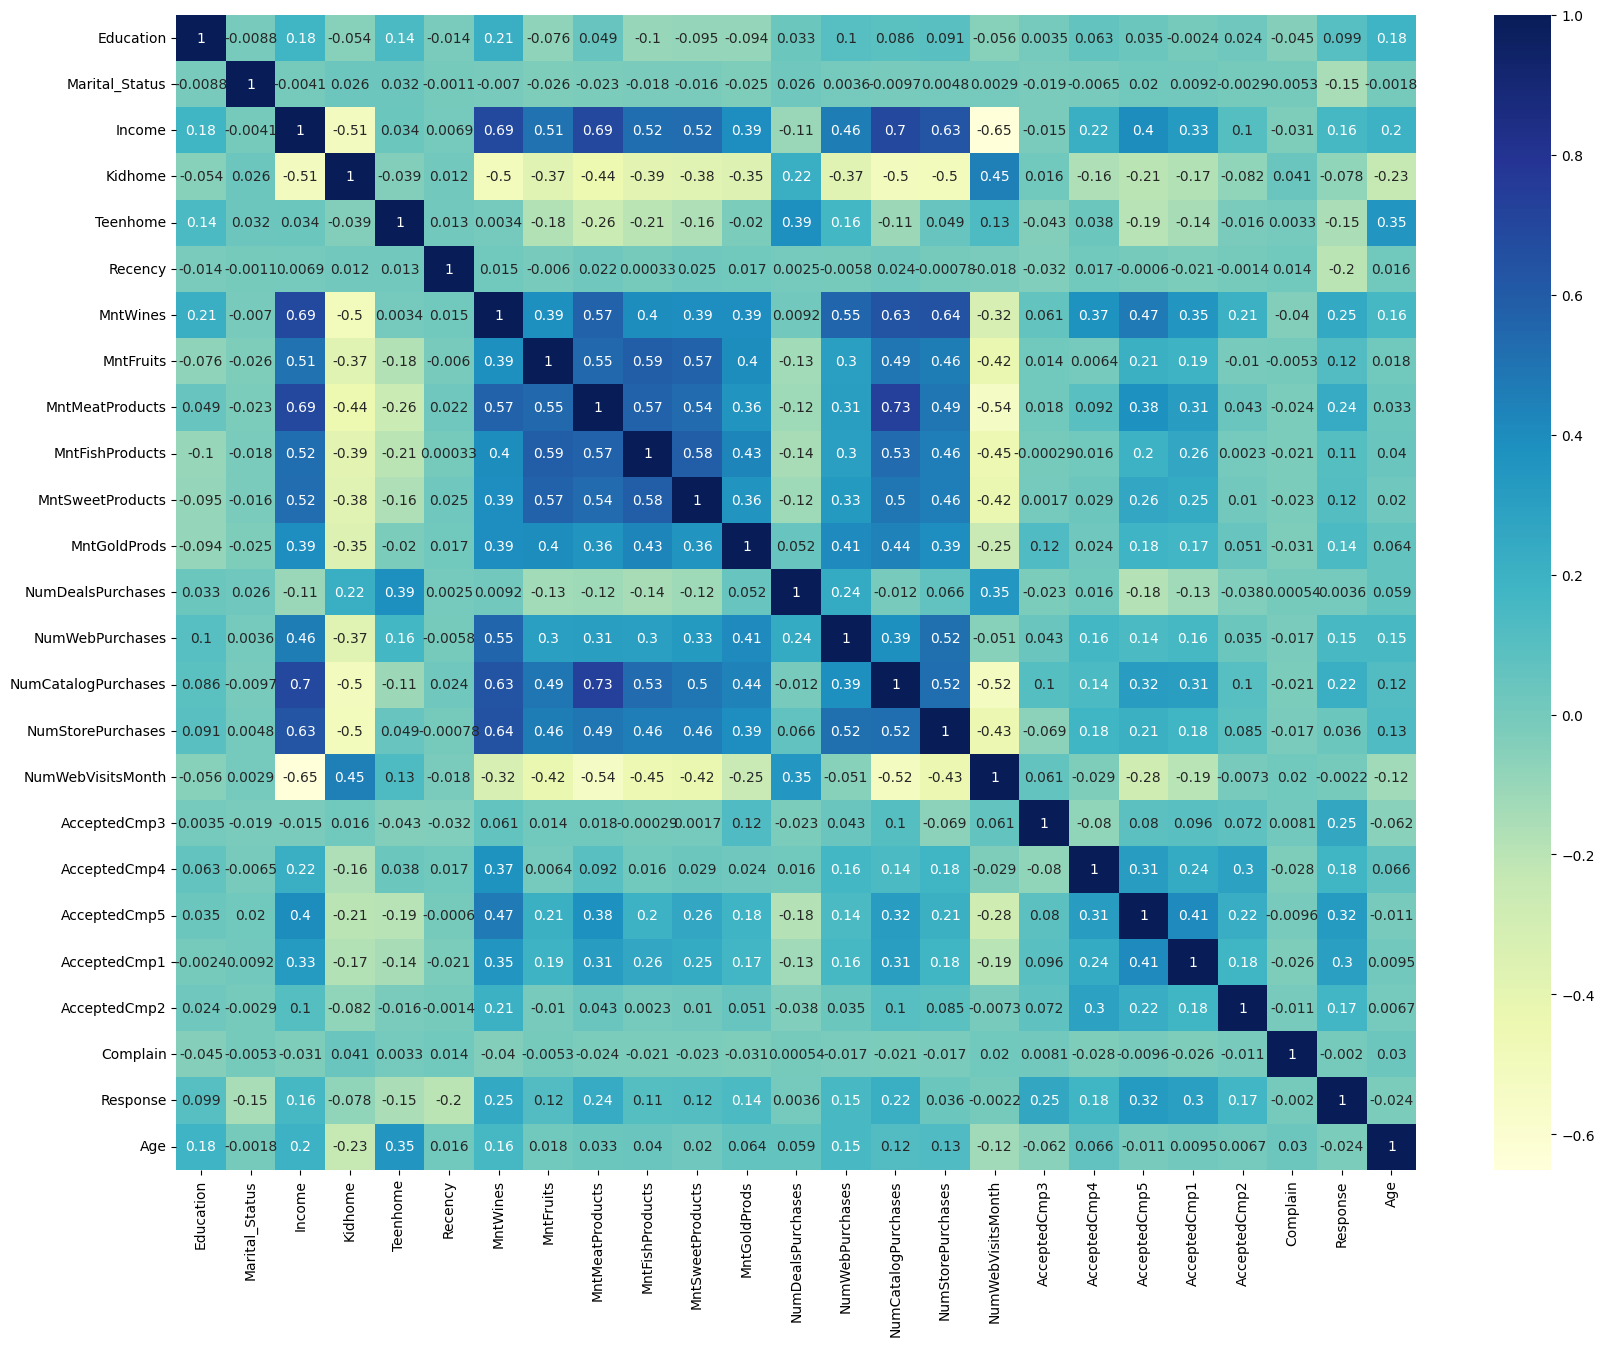

In [258]:
fig = plt.figure(figsize = (20,15))
sns.heatmap(df_correlation.corr(), cmap='YlGnBu', annot=True);

In [259]:
print(df.columns)
print(df['Income'].isnull().sum())

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age'],
      dtype='object')
0


In [260]:
#Set Train and Testing
X,y = df,df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [261]:
#PCA
pca = PCA(n_components = 9)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [262]:
#el acumulado de varianza explicada en las nuevas dimensiones
expl = pca.explained_variance_ratio_
print(expl)
print('suma',sum(expl))

[9.99795030e-01 1.37338126e-04 5.20346036e-05 6.37914813e-06
 3.57622285e-06 2.03316084e-06 1.80448416e-06 1.47432101e-06
 2.84111967e-07]
suma 0.9999999538799613


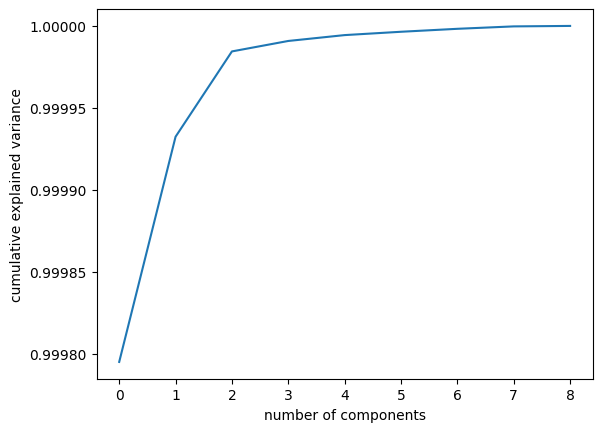

In [263]:
#graficar el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(expl))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [264]:
pca = PCA(n_components = 4)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
df_pca = pd.DataFrame(X_train_pca, columns = ['PC1', 'PC2','PC3','PC4'])
df_pca

PC1         PC2         PC3         PC4
0     21150.364938  311.006646  -37.993703  -52.740449
1    -48794.035100 -243.875762  111.343740   -3.959618
2    -10286.623536   85.008046  -63.838214    8.802876
3    -35148.940886  -91.516220   65.740550  -13.836840
4     17105.069189  116.221505  -95.830783   12.558072
...            ...         ...         ...         ...
1545 -18712.880771   78.452739   13.583971   -3.123725
1546  17604.663850  188.641705  -17.988816 -102.569754
1547 -11538.195446  130.567506  -44.785536   28.848100
1548  -2318.294971  198.052515  -53.390584   26.586722
1549 -14367.369152  -38.409722  -35.604099   27.045391

[1550 rows x 4 columns]

In [265]:
len(X_train_pca)

1550

In [266]:
len(X_test_pca)

665

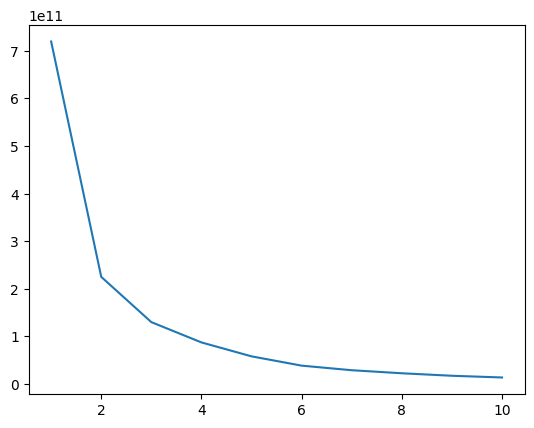

In [299]:
X_pca_plus = df_pca[['PC1', 'PC2','PC3','PC4']]
X_pca_random = df_pca[['PC1', 'PC2','PC3','PC4']]
sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=20, random_state=0)
    kmeans.fit(X_train_pca)
    sse.append(kmeans.inertia_)
plt.plot(range(1,11),sse)
plt.show()

In [300]:
# Predicting the clusters
n_clusters_ = 3
kmeans_ = KMeans(n_clusters=n_clusters_, init='k-means++', max_iter=100, n_init=20, random_state=0)
labels = kmeans_.fit(X_train_pca)
y_kmeans = kmeans_.fit_predict(X_train_pca)
C = kmeans_.cluster_centers_
C

array([[ 2.45683894e+04, -4.98084119e+01,  4.31531059e+01,
        -5.43079645e+00],
       [-2.39934323e+04,  1.93301280e+01,  2.80946622e+01,
         3.11782008e+00],
       [ 2.27703984e+02,  2.67153069e+01, -6.47204211e+01,
         1.97628676e+00]])

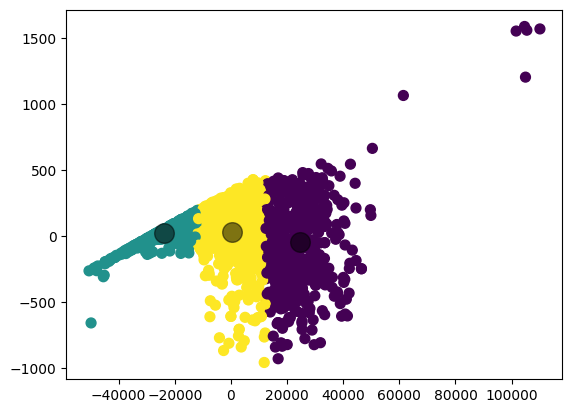

In [301]:
centers = C
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [302]:
X_pca_plus['labels']= y_kmeans
X_pca_plus

PC1         PC2         PC3         PC4  labels
0     21150.364938  311.006646  -37.993703  -52.740449       0
1    -48794.035100 -243.875762  111.343740   -3.959618       1
2    -10286.623536   85.008046  -63.838214    8.802876       2
3    -35148.940886  -91.516220   65.740550  -13.836840       1
4     17105.069189  116.221505  -95.830783   12.558072       0
...            ...         ...         ...         ...     ...
1545 -18712.880771   78.452739   13.583971   -3.123725       1
1546  17604.663850  188.641705  -17.988816 -102.569754       0
1547 -11538.195446  130.567506  -44.785536   28.848100       2
1548  -2318.294971  198.052515  -53.390584   26.586722       2
1549 -14367.369152  -38.409722  -35.604099   27.045391       1

[1550 rows x 5 columns]

In [303]:
kmeans_random = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
kmeans_random.fit(X_train_pca)
y_kmeans = kmeans_random.fit_predict(X_train_pca)
C = kmeans_random.cluster_centers_
C

array([[ 2.45683894e+04, -4.98084119e+01,  4.31531059e+01,
        -5.43079645e+00],
       [-2.39934323e+04,  1.93301280e+01,  2.80946622e+01,
         3.11782008e+00],
       [ 2.27703984e+02,  2.67153069e+01, -6.47204211e+01,
         1.97628676e+00]])

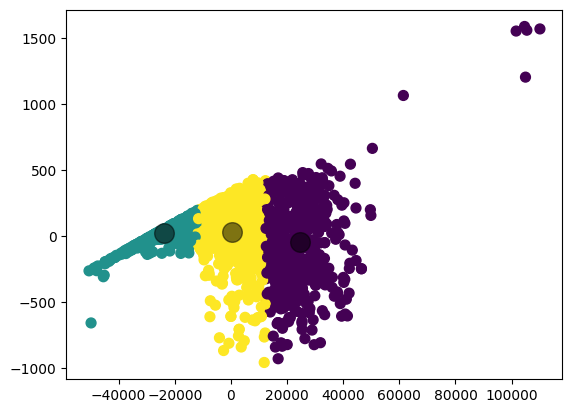

In [304]:
centers = C
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c = y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [305]:
X_pca_plus['labels']= kmeans_.labels_
X_pca_plus

PC1         PC2         PC3         PC4  labels
0     21150.364938  311.006646  -37.993703  -52.740449       0
1    -48794.035100 -243.875762  111.343740   -3.959618       1
2    -10286.623536   85.008046  -63.838214    8.802876       2
3    -35148.940886  -91.516220   65.740550  -13.836840       1
4     17105.069189  116.221505  -95.830783   12.558072       0
...            ...         ...         ...         ...     ...
1545 -18712.880771   78.452739   13.583971   -3.123725       1
1546  17604.663850  188.641705  -17.988816 -102.569754       0
1547 -11538.195446  130.567506  -44.785536   28.848100       2
1548  -2318.294971  198.052515  -53.390584   26.586722       2
1549 -14367.369152  -38.409722  -35.604099   27.045391       1

[1550 rows x 5 columns]

In [306]:
X_pca_plus.describe()

PC1           PC2           PC3           PC4       labels
count  1.550000e+03  1.550000e+03  1.550000e+03  1.550000e+03  1550.000000
mean  -1.089047e-12 -9.388332e-15  5.390956e-15  2.493776e-15     1.036774
std    2.155371e+04  2.526168e+02  1.554937e+02  5.444374e+01     0.818959
min   -5.056589e+04 -9.584865e+02 -5.561781e+02 -2.310855e+02     0.000000
25%   -1.661586e+04 -1.071837e+02 -8.265837e+01 -1.810641e+01     0.000000
50%   -1.608663e+02  3.702146e+01 -1.054655e+01  1.148563e+01     1.000000
75%    1.672402e+04  1.447308e+02  5.171292e+01  2.804673e+01     2.000000
max    1.100892e+05  1.585879e+03  1.769037e+03  3.641028e+02     2.000000

<Axes: xlabel='PC1', ylabel='PC2'>

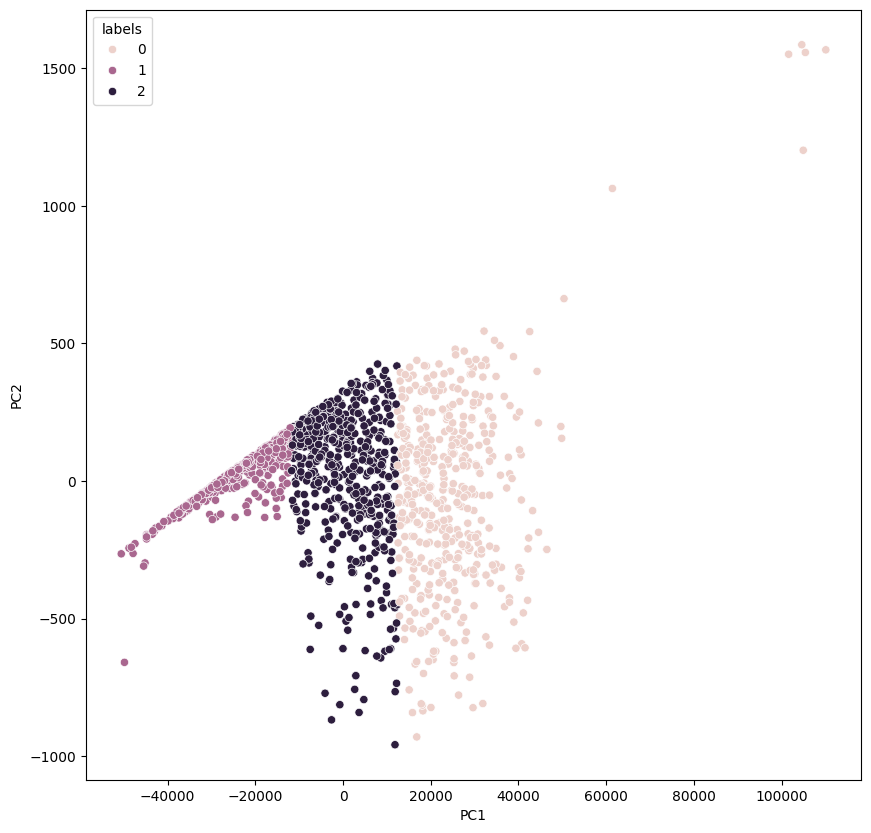

In [307]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=X_pca_plus, x="PC1", y="PC2", ax=ax, hue="labels")

In [308]:
# find the maximum of each column
maxValues = X_pca_plus.max()
print(maxValues)

PC1       110089.187241
PC2         1585.879045
PC3         1769.037238
PC4          364.102793
labels         2.000000
dtype: float64


In [309]:
#Seek and destroy
print(X_pca_plus.idxmax())

PC1        944
PC2       1393
PC3        797
PC4       1161
labels       2
dtype: int64


In [310]:
#multiple cleaning
X_pca_plus = X_pca_plus.drop([944],axis=0)
X_pca_plus = X_pca_plus.drop([323],axis=0)
X_pca_plus = X_pca_plus.drop([1161],axis=0)
X_pca_plus = X_pca_plus.drop([1393],axis=0)
X_pca_plus = X_pca_plus.drop([357],axis=0)



<Axes: xlabel='PC1', ylabel='PC2'>

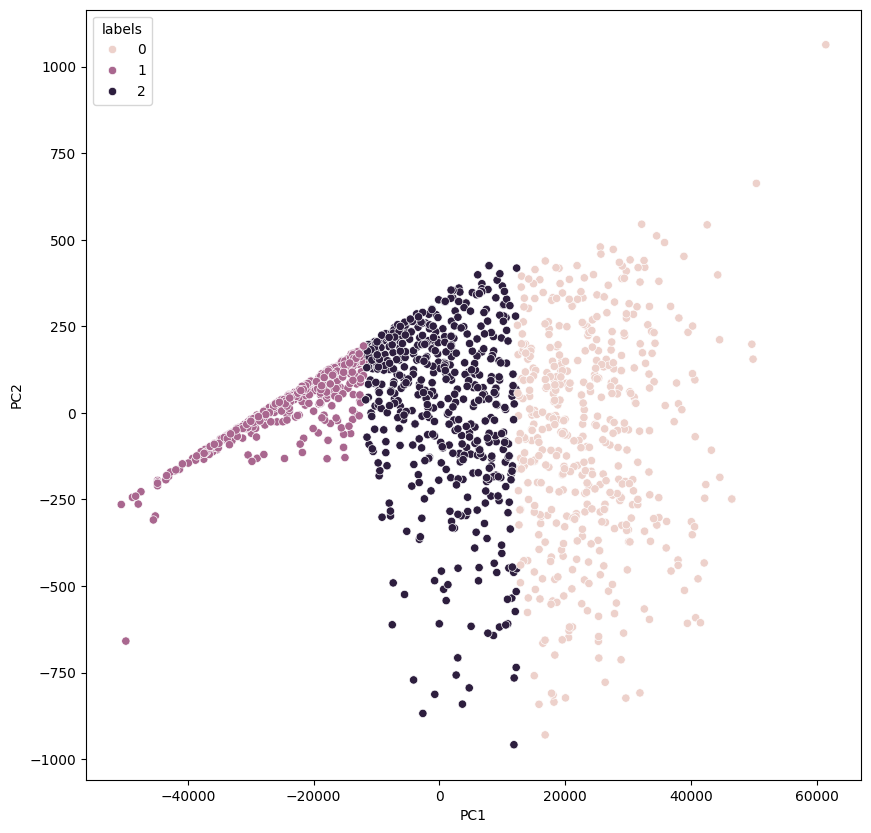

In [311]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=X_pca_plus, x="PC1", y="PC2", ax=ax, hue="labels")

In [312]:
#SVM

In [313]:
from sklearn import svm
from sklearn.metrics import accuracy_score

In [314]:
X = X_pca_plus2[['PC1', 'PC2', 'PC3','PC4']].values
y = X_pca_plus2.labels
y

0       0
1       1
2       2
3       1
4       0
       ..
1545    1
1546    0
1547    2
1548    2
1549    1
Name: labels, Length: 1544, dtype: int32

In [315]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
clf_svm = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clf_svm.fit(X_train, y_train)

SVC(kernel='linear')

In [316]:
#Predict the response for test dataset
y_pred = clf_svm.predict(X_test)

In [317]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [318]:
# Create dataframe with predict values

In [319]:
df_predict = pd.DataFrame(X_test, columns = ['PC1','PC2', 'PC3','PC4'])
df_predict['labels'] = y_pred
df_predict

PC1         PC2         PC3        PC4  labels
0    17422.256251  226.644356   -1.525626 -78.675095       0
1     6942.546622 -128.122982  236.819129   4.223423       2
2    10991.514783  -89.478429    1.456063 -71.088866       2
3   -33805.227874  -65.405759   50.309351   7.092813       1
4   -34810.163572  -75.522486   54.858728  -0.803951       1
..            ...         ...         ...        ...     ...
459 -15054.488662  139.840004  -23.690235  11.928209       1
460 -36282.978742  -96.948490   64.032120  -6.315381       1
461   6995.976510   39.483794 -142.118931  31.792786       2
462 -31710.357230  -41.736010   45.837849   2.966146       1
463  25326.555240  100.516191 -171.193448  69.227701       0

[464 rows x 5 columns]

In [320]:
df2 = df_predict.loc[(df_predict['labels'] == 0) | (df_predict['labels'] == 1)]
X_1 = df2[['PC1', 'PC2', 'PC3','PC4']].values
y_1 = df2.labels

Automatically created module for IPython interactive environment


Text(0.5, 1.0, 'Relation ')

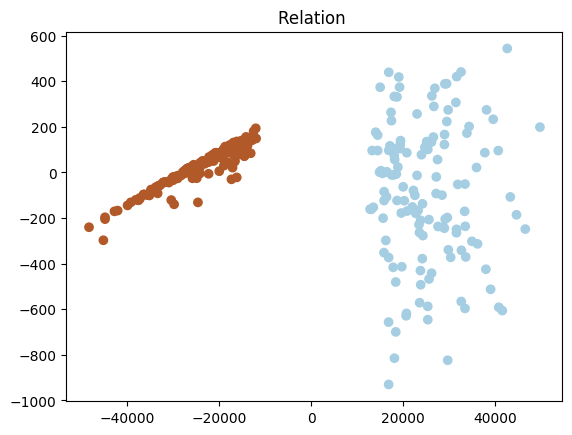

In [321]:
#MMC 
print(__doc__)

#Librerías requeridas

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Se crean los datos
X = X_1
Y = y_1

#Se estima el modelo
clf = clf_svm

# Se construye la recta que separa las clases
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]


# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])


plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

plt.title('Relation ')

In [322]:
df_rand = df_predict.loc[(df_predict['labels'] == 1) | (df_predict['labels'] == 2)]
X_1 = df_rand[['PC1', 'PC2', 'PC3','PC4']].values
y_1 = df_rand.labels

Automatically created module for IPython interactive environment


Text(0.5, 1.0, 'Relation ')

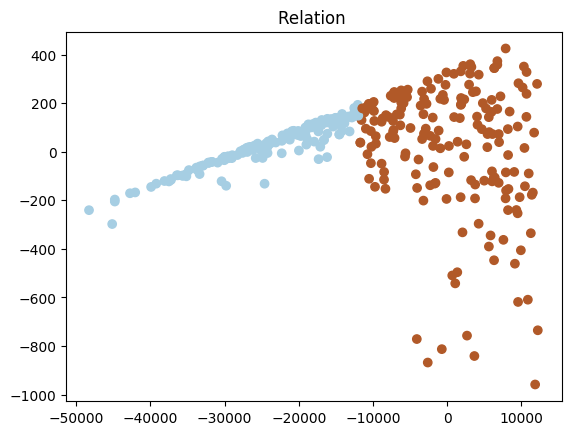

In [323]:
#Plot
#MMC 
print(__doc__)

#Librerías requeridas

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Se crean los datos
X = X_1
Y = y_1

#Se estima el modelo
clf = clf_svm

# Se construye la recta que separa las clases
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]


# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])


plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

plt.title('Relation ')

In [324]:
df_rand = df_predict.loc[(df_predict['labels'] == 0) | (df_predict['labels'] == 2)]
X_1 = df_rand[['PC1', 'PC2','PC3','PC4']].values
y_1 = df_rand.labels

Automatically created module for IPython interactive environment


Text(0.5, 1.0, 'Relation ')

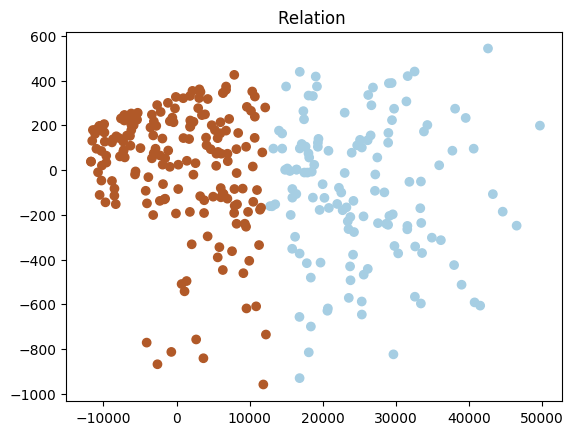

In [325]:
#MMC 
print(__doc__)

#Librerías requeridas

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Se crean los datos
X = X_1
Y = y_1

#Se estima el modelo
clf = clf_svm

# Se construye la recta que separa las clases
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]


# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])


plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

plt.title('Relation ')

<Axes: xlabel='PC1', ylabel='PC2'>

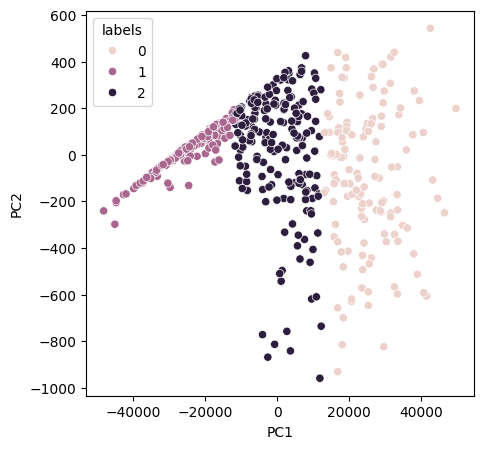

In [326]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=df_predict, x="PC1", y="PC2", ax=ax, hue="labels")

In [327]:
#Save model
import pickle

In [328]:
pickle_file_pca = 'pca_model_integrador.pkl'
with open(pickle_file_pca,'wb') as file:
    pickle.dump(pca,file)

pickle_file_kmeans = 'kmeans_model_integrador.pkl'
with open(pickle_file_kmeans,'wb') as file:
    pickle.dump(kmeans_,file)

pickle_file_svm = 'svm_model_integrador.pkl'
with open(pickle_file_svm,'wb') as file:
    pickle.dump(clf_svm,file)

In [329]:
#PCA
with open(pickle_file_pca,'rb') as file:
    pickle_pca = pickle.load(file)
X_PCA = pickle_pca.transform(df)
len(X_PCA)

2215

In [330]:
#SVM 
with open(pickle_file_svm,'rb') as file:
    pickle_svm = pickle.load(file)
X_SVM = pickle_svm.predict(X_PCA)
len(X_SVM)

2215

In [331]:
X_SVM

array([2, 2, 0, ..., 2, 0, 2])

In [332]:
len(df)

2215

In [333]:
df['labels'] = X_SVM

In [334]:
df.to_csv(os.environ['DATASETS_PATH'] + "/marketing_campaign_classified" + ".csv")

In [335]:
df

Education  Marital_Status   Income  Kidhome  Teenhome  Recency  \
0             2               0  58138.0        0         0       58   
1             2               0  46344.0        1         1       38   
2             2               1  71613.0        0         0       26   
3             2               1  26646.0        1         0       26   
4             4               1  58293.0        1         0       94   
...         ...             ...      ...      ...       ...      ...   
2235          2               1  61223.0        0         1       46   
2236          4               1  64014.0        2         1       56   
2237          2               0  56981.0        0         0       91   
2238          3               1  69245.0        0         1        8   
2239          4               1  52869.0        1         1       40   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  \
0          635         88              546              172  ...   
1           11          1                6                2  ...   
2          426         49              127              111  ...   
3           11          4               20               10  ...   
4          173         43              118               46  ...   
...        ...        ...              ...              ...  ...   
2235       709         43              182               42  ...   
2236       406          0               30                0  ...   
2237       908         48              217               32  ...   
2238       428         30              214               80  ...   
2239        84          3               61                2  ...   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0             0             0   
2236                  7             0             0             0   
2237                  6             0             1             0   
2238                  3             0             0             0   
2239                  7             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  labels  
0                0             0         0         1   66       2  
1                0             0         0         0   69       2  
2                0             0         0         0   58       0  
3                0             0         0         0   39       1  
4                0             0         0         0   42       2  
...            ...           ...       ...       ...  ...     ...  
2235             0             0         0         0   56       2  
2236             1             0         0         0   77       2  
2237             0             0         0         0   42       2  
2238             0             0         0         0   67       0  
2239             0             0         0         1   69       2  

[2215 rows x 26 columns]

In [336]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'labels'],
      dtype='object')

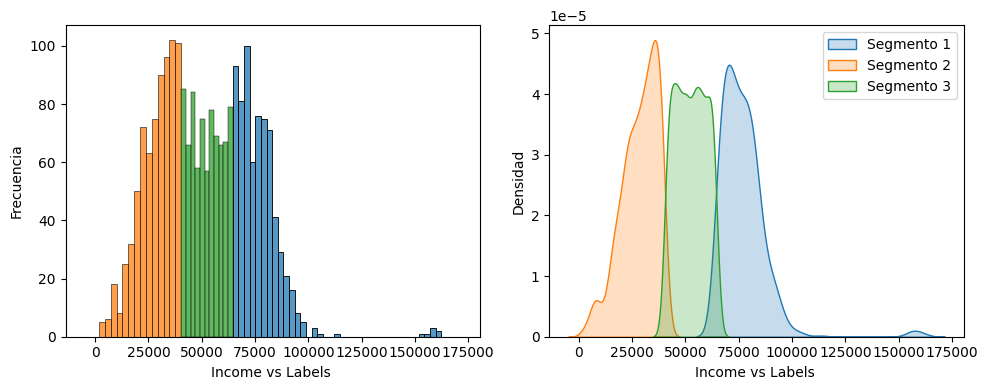

In [337]:
#Income per segment
var = 'Income'
var_title = 'Income vs Labels '

filter = df['labels'] == 0
df_segment_1 = df.loc[filter]

filter = df['labels'] == 1
df_segment_2 = df.loc[filter]

filter = df['labels'] == 2
df_segment_3 = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Segmento 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Segmento 2", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Segmento 3", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Segmento 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Segmento 2", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Segmento 3", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

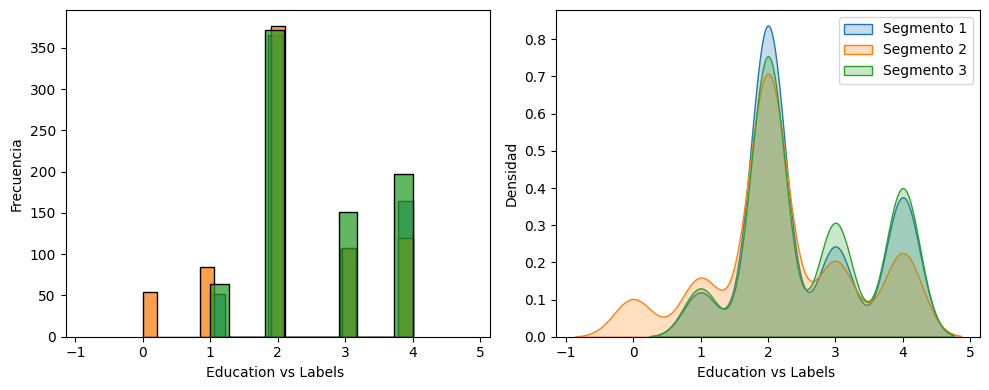

In [338]:
#Education per segment
var = 'Education'
var_title = 'Education vs Labels '

filter = df['labels'] == 0
df_segment_1 = df.loc[filter]

filter = df['labels'] == 1
df_segment_2 = df.loc[filter]

filter = df['labels'] == 2
df_segment_3 = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Segmento 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Segmento 2", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Segmento 3", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Segmento 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Segmento 2", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Segmento 3", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

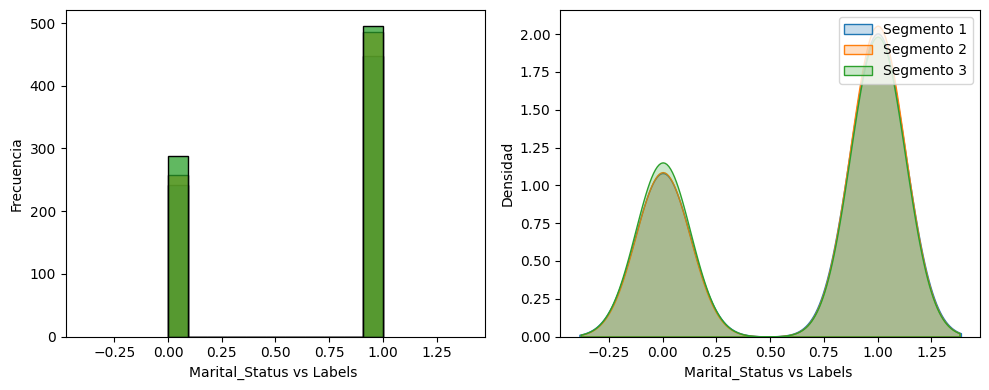

In [339]:
#Marital_Status per segment
var = 'Marital_Status'
var_title = 'Marital_Status vs Labels '

filter = df['labels'] == 0
df_segment_1 = df.loc[filter]

filter = df['labels'] == 1
df_segment_2 = df.loc[filter]

filter = df['labels'] == 2
df_segment_3 = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Segmento 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Segmento 2", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Segmento 3", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Segmento 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Segmento 2", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Segmento 3", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

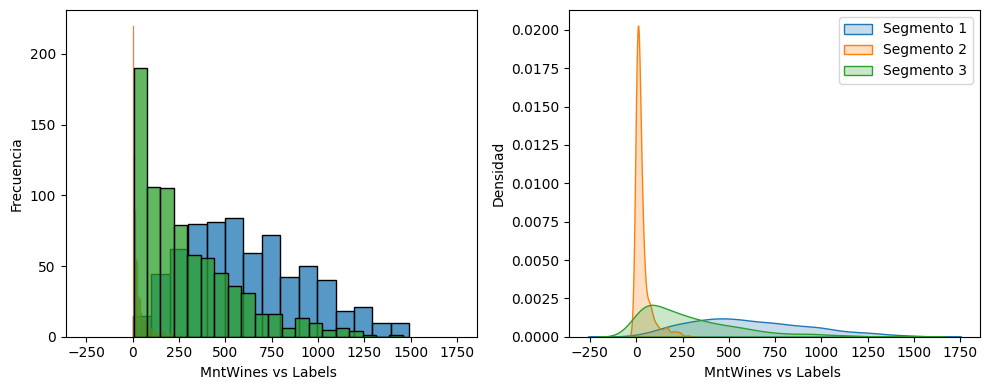

In [340]:
#MntWines per segment
var = 'MntWines'
var_title = 'MntWines vs Labels '

filter = df['labels'] == 0
df_segment_1 = df.loc[filter]

filter = df['labels'] == 1
df_segment_2 = df.loc[filter]

filter = df['labels'] == 2
df_segment_3 = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Segmento 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Segmento 2", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Segmento 3", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Segmento 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Segmento 2", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Segmento 3", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

In [341]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'labels'],
      dtype='object')

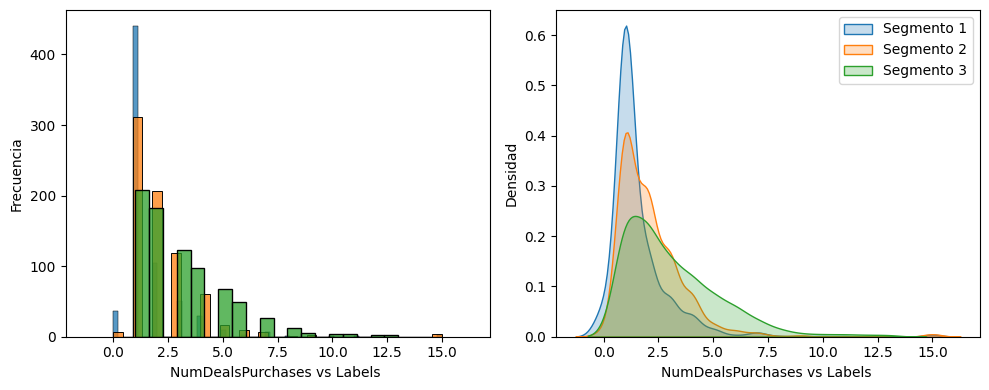

In [342]:
#NumDealsPurchases per segment
var = 'NumDealsPurchases'
var_title = 'NumDealsPurchases vs Labels '

filter = df['labels'] == 0
df_segment_1 = df.loc[filter]

filter = df['labels'] == 1
df_segment_2 = df.loc[filter]

filter = df['labels'] == 2
df_segment_3 = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Segmento 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Segmento 2", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Segmento 3", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Segmento 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Segmento 2", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Segmento 3", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

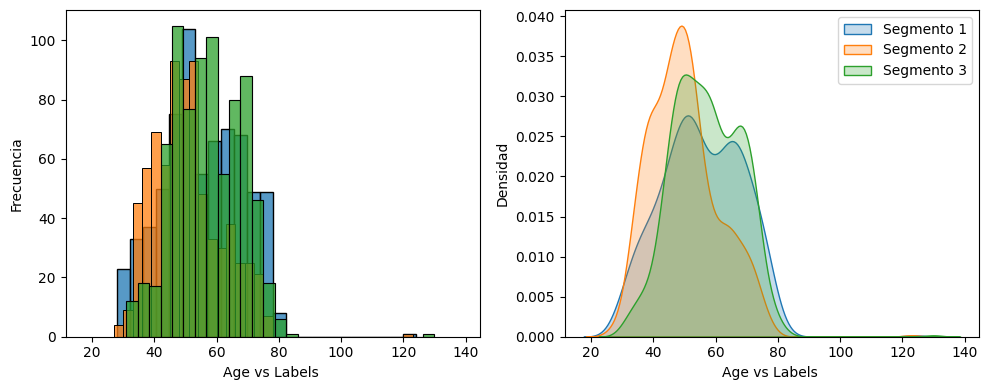

In [343]:
#Age per segment
var = 'Age'
var_title = 'Age vs Labels '

filter = df['labels'] == 0
df_segment_1 = df.loc[filter]

filter = df['labels'] == 1
df_segment_2 = df.loc[filter]

filter = df['labels'] == 2
df_segment_3 = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Segmento 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Segmento 2", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Segmento 3", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Segmento 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Segmento 2", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Segmento 3", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

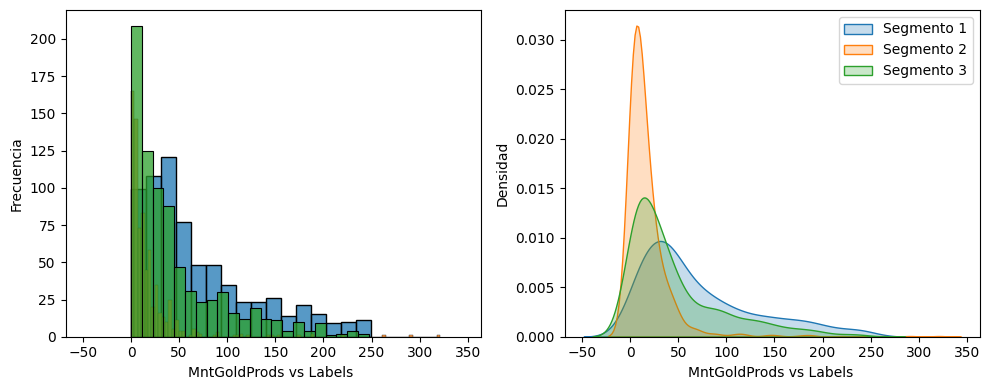

In [344]:
#MntGoldProds per segment
#Here we can see relations
var = 'MntGoldProds'
var_title = 'MntGoldProds vs Labels '

filter = df['labels'] == 0
df_segment_1 = df.loc[filter]

filter = df['labels'] == 1
df_segment_2 = df.loc[filter]

filter = df['labels'] == 2
df_segment_3 = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Segmento 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Segmento 2", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Segmento 3", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Segmento 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Segmento 2", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Segmento 3", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

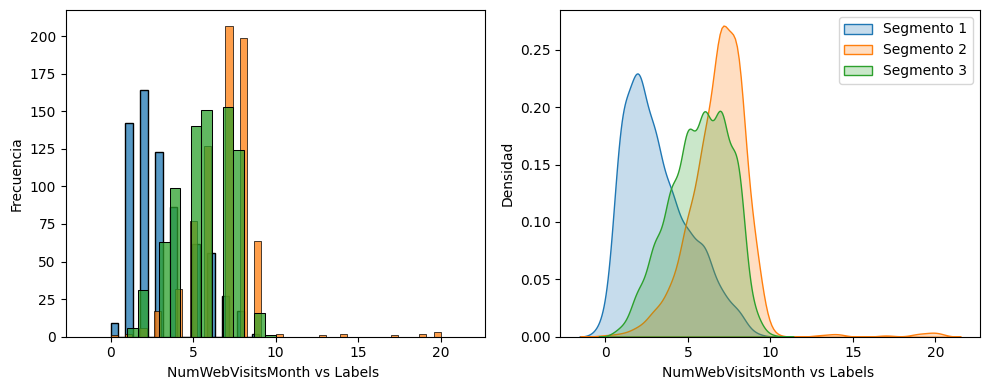

In [345]:
#NumWebVisitsMonth per segment
var = 'NumWebVisitsMonth'
var_title = 'NumWebVisitsMonth vs Labels '

filter = df['labels'] == 0
df_segment_1 = df.loc[filter]

filter = df['labels'] == 1
df_segment_2 = df.loc[filter]

filter = df['labels'] == 2
df_segment_3 = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Segmento 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Segmento 2", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Segmento 3", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Segmento 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Segmento 2", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Segmento 3", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

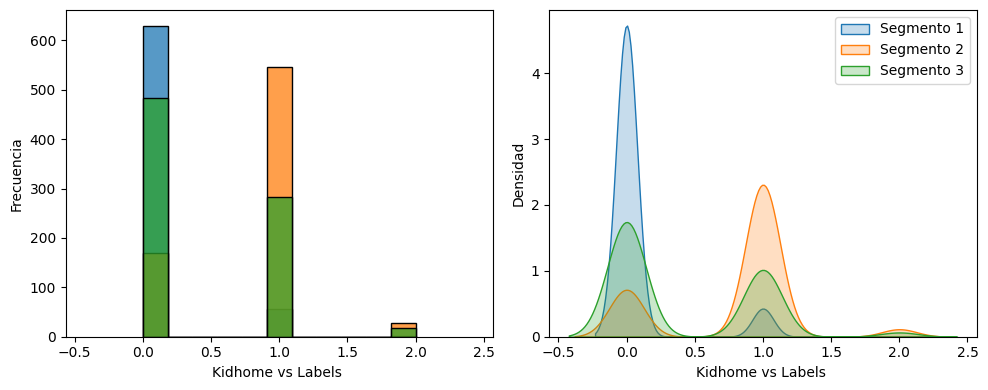

In [346]:
#Kidhome per segment
var = 'Kidhome'
var_title = 'Kidhome vs Labels '

filter = df['labels'] == 0
df_segment_1 = df.loc[filter]

filter = df['labels'] == 1
df_segment_2 = df.loc[filter]

filter = df['labels'] == 2
df_segment_3 = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Segmento 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Segmento 2", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Segmento 3", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Segmento 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Segmento 2", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Segmento 3", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

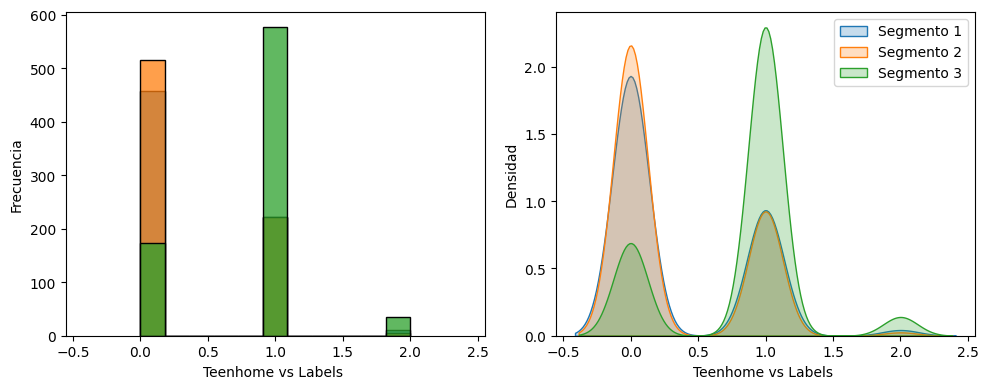

In [347]:
#Teenhome per segment
var = 'Teenhome'
var_title = 'Teenhome vs Labels '

filter = df['labels'] == 0
df_segment_1 = df.loc[filter]

filter = df['labels'] == 1
df_segment_2 = df.loc[filter]

filter = df['labels'] == 2
df_segment_3 = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Segmento 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Segmento 2", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Segmento 3", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Segmento 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Segmento 2", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Segmento 3", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

In [348]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'labels'],
      dtype='object')

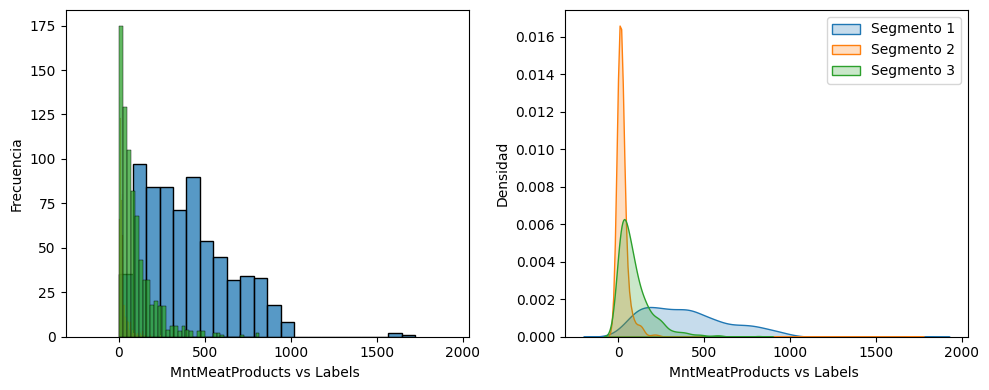

In [349]:
#MntMeatProducts per segment
var = 'MntMeatProducts'
var_title = 'MntMeatProducts vs Labels '

filter = df['labels'] == 0
df_segment_1 = df.loc[filter]

filter = df['labels'] == 1
df_segment_2 = df.loc[filter]

filter = df['labels'] == 2
df_segment_3 = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Segmento 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Segmento 2", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Segmento 3", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Segmento 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Segmento 2", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Segmento 3", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

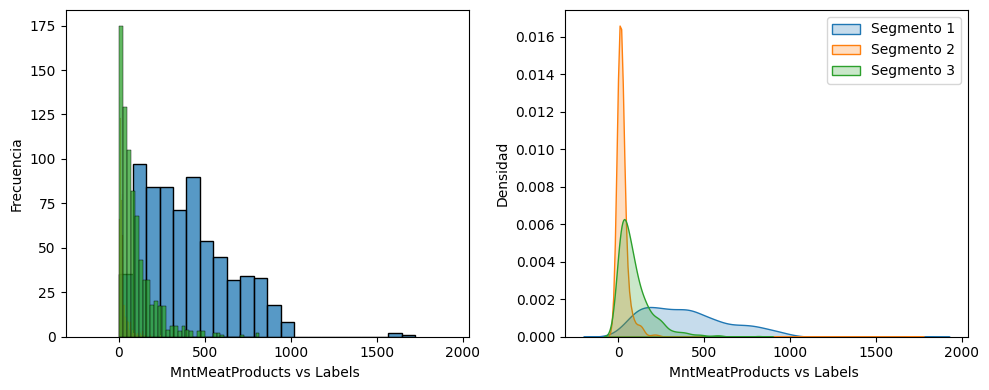

In [349]:
#MntMeatProducts per segment
var = 'MntMeatProducts'
var_title = 'MntMeatProducts vs Labels '

filter = df['labels'] == 0
df_segment_1 = df.loc[filter]

filter = df['labels'] == 1
df_segment_2 = df.loc[filter]

filter = df['labels'] == 2
df_segment_3 = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Segmento 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Segmento 2", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Segmento 3", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Segmento 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Segmento 2", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Segmento 3", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

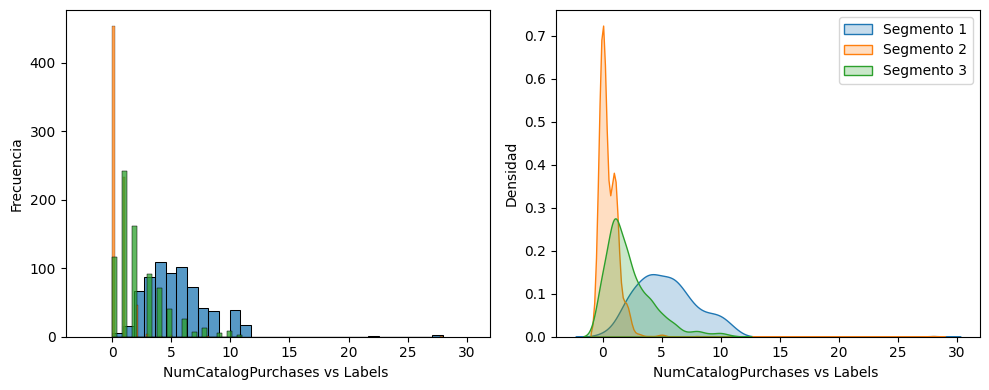

In [351]:
#NumCatalogPurchases per segment
var = 'NumCatalogPurchases'
var_title = 'NumCatalogPurchases vs Labels '

filter = df['labels'] == 0
df_segment_1 = df.loc[filter]

filter = df['labels'] == 1
df_segment_2 = df.loc[filter]

filter = df['labels'] == 2
df_segment_3 = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Segmento 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Segmento 2", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Segmento 3", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Segmento 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Segmento 2", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Segmento 3", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

In [352]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'labels'],
      dtype='object')

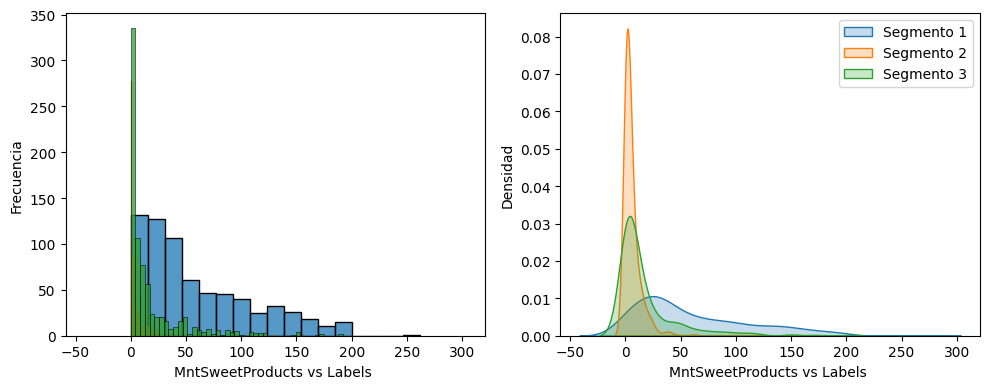

In [353]:
#MntSweetProducts per segment
var = 'MntSweetProducts'
var_title = 'MntSweetProducts vs Labels '

filter = df['labels'] == 0
df_segment_1 = df.loc[filter]

filter = df['labels'] == 1
df_segment_2 = df.loc[filter]

filter = df['labels'] == 2
df_segment_3 = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Segmento 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Segmento 2", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Segmento 3", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Segmento 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Segmento 2", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Segmento 3", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

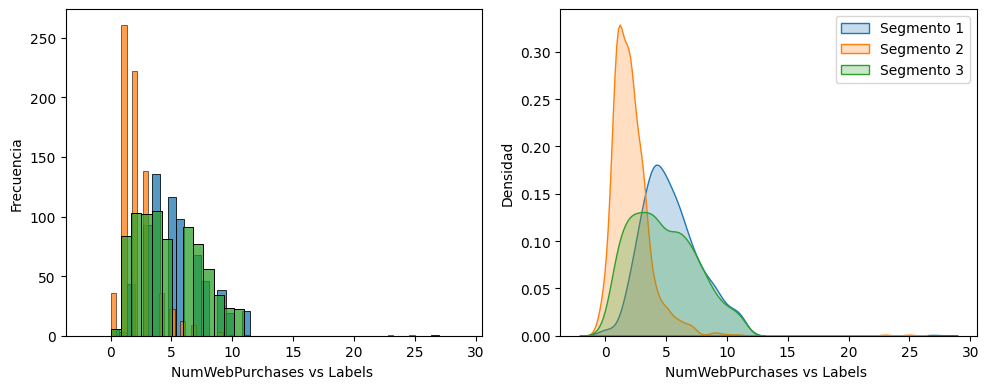

In [354]:
#NumWebPurchases per segment
var = 'NumWebPurchases'
var_title = 'NumWebPurchases vs Labels '

filter = df['labels'] == 0
df_segment_1 = df.loc[filter]

filter = df['labels'] == 1
df_segment_2 = df.loc[filter]

filter = df['labels'] == 2
df_segment_3 = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Segmento 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Segmento 2", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Segmento 3", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Segmento 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Segmento 2", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Segmento 3", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

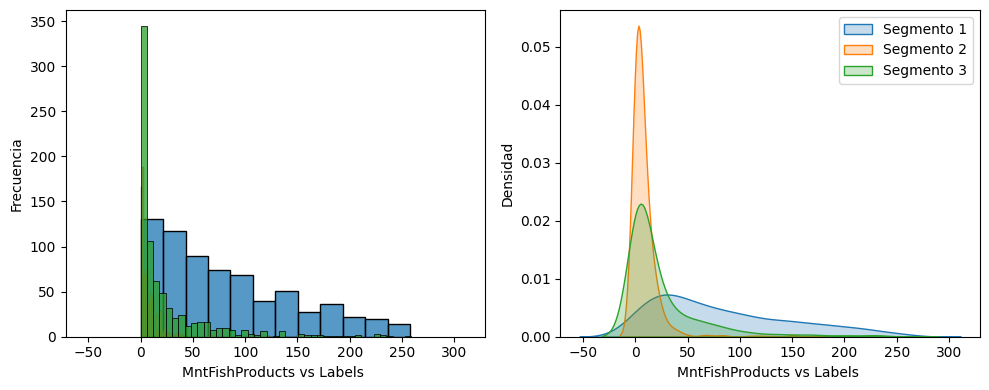

In [355]:
#MntFishProducts per segment
var = 'MntFishProducts'
var_title = 'MntFishProducts vs Labels '

filter = df['labels'] == 0
df_segment_1 = df.loc[filter]

filter = df['labels'] == 1
df_segment_2 = df.loc[filter]

filter = df['labels'] == 2
df_segment_3 = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Segmento 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Segmento 2", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Segmento 3", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Segmento 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Segmento 2", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Segmento 3", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

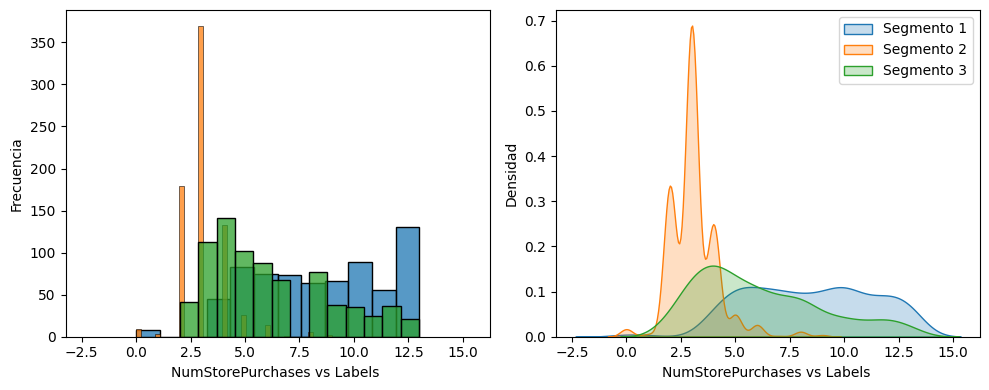

In [356]:
#NumStorePurchases per segment
var = 'NumStorePurchases'
var_title = 'NumStorePurchases vs Labels '

filter = df['labels'] == 0
df_segment_1 = df.loc[filter]

filter = df['labels'] == 1
df_segment_2 = df.loc[filter]

filter = df['labels'] == 2
df_segment_3 = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Segmento 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Segmento 2", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Segmento 3", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Segmento 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Segmento 2", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Segmento 3", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

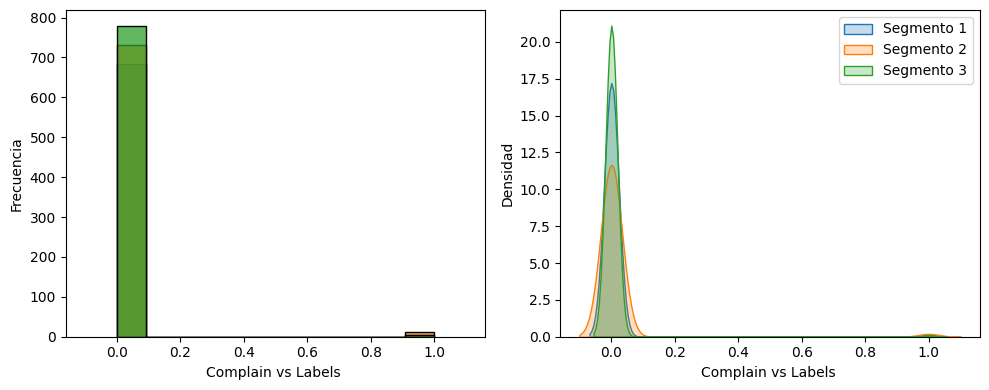

In [357]:
#Complain per segment
var = 'Complain'
var_title = 'Complain vs Labels '

filter = df['labels'] == 0
df_segment_1 = df.loc[filter]

filter = df['labels'] == 1
df_segment_2 = df.loc[filter]

filter = df['labels'] == 2
df_segment_3 = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Segmento 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Segmento 2", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Segmento 3", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Segmento 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Segmento 2", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Segmento 3", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

In [359]:
'''
General
	Education: Todos los segmentos parecieran tener de todos tipos de educacion
		Segmento dos un poco bajo en Phd
	Marital Status:Bastante similar, la mayoria casados
Segmento 1
	Income : Es el que más gana
	MntWines:Es el que mas gasta en Vino
	NumDealsPurchases: Es el que mas a aprovechado las ofertas
	Age:Tienden a ser la media de la edad
	MntGoldProds: Compran mas oro
	NumWebVisitsMonth: Visita poco la web
	NumWebPurchases :Es el que mas compra en linea
	Kidhome:La gran mayoria NO tiene niños en casa
	Teenhome: Algunos tienen adolescentes en casa
	MntMeatProducts: Gasta más en carne
	MntFruits: Gasta más en frutas
	NumCatalogPurchases :Usa mucho el catalogo
	MntSweetProducts: Gastan mas en dulces
	MntFishProducts: Gastan mas en pescado
	NumStorePurchases:Compra mucho en la tienda fisica
	
Segmento 2
	Income: Es la mas baja
	MntWines:Es el que menos gasta en vino
	NumDealsPurchases: Aprovecha las ofertas
	Age:Tienden a ser los mas jovenes
	MntGoldProds: La mayoria no invierte en oro
	NumWebVisitsMonth: Visita la web mas seguido
	NumWebPurchases: Compran muy poco en linea	
	Kidhome:La gran mayoria SI tiene niños en casa
	Teenhome: La mayoria NO tiene adolescentes en casa
	MntMeatProducts: La mayoria casi no gasta en carne
	MntFruits: Casi no gasta en frutas
	NumCatalogPurchases :Usa muy poco el catalogo
	MntSweetProducts: Casi no gastan en dulces
	MntFishProducts:No gasta en pescado
	NumStorePurchases:Compra poco en la tienda
Segmento 3
	Income: Es el intermedio
	MntWines:Gastan poco en vino
	NumDealsPurchases: Es el que menos a aprovechado las ofertas
	Age:Tienden a ser los mas viejos
	MntGoldProds: Compran poco oro
	NumWebVisitsMonth: Visita la web masomenos seguido
	NumWebPurchases: Aveces compra en linea
	Kidhome: Algunos tienen niños en casa otros no
	Teenhome: La mayoria SI tiene adolescentes en casa
	MntMeatProducts: La mayoria gasta poco en carne
	MntFruits: Gasta poco en frutas
	NumCatalogPurchases :Casi no usa el catalogo
	MntSweetProducts:Gastan algo en dulces
	MntFishProducts:Casi no gasta en pescado
	NumStorePurchases:Compra seguido en tienda
 '''

'\nGeneral\n\tEducation: Todos los segmentos parecieran tener de todos tipos de educacion\n\t\tSegmento dos un poco bajo en Phd\n\tMarital Status:Bastante similar, la mayoria casados\nSegmento 1\n\tIncome : Es el que más gana\n\tMntWines:Es el que mas gasta en Vino\n\tNumDealsPurchases: Es el que mas a aprovechado las ofertas\n\tAge:Tienden a ser la media de la edad\n\tMntGoldProds: Compran mas oro\n\tNumWebVisitsMonth: Visita poco la web\n\tNumWebPurchases :Es el que mas compra en linea\n\tKidhome:La gran mayoria NO tiene niños en casa\n\tTeenhome: Algunos tienen adolescentes en casa\n\tMntMeatProducts: Gasta más en carne\n\tMntFruits: Gasta más en frutas\n\tNumCatalogPurchases :Usa mucho el catalogo\n\tMntSweetProducts: Gastan mas en dulces\n\tMntFishProducts: Gastan mas en pescado\n\tNumStorePurchases:Compra mucho en la tienda\n\t\nSegmento 2\n\tIncome: Es la mas baja\n\tMntWines:Es el que menos gasta en vino\n\tNumDealsPurchases: Aprovecha las ofertas\n\tAge:Tienden a ser los mas j